In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from os import path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
import cv2
from PIL import Image
from PIL import Image as im
import re
from keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
import seaborn as sns


import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt
import numpy as np
import random
import shutil

In [ ]:
print(tf.__version__)

2.12.0


# Directory Preparation

In [ ]:
#mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Original Image Data Directory
data_dir = "/content/drive/MyDrive/FaceShape Dataset"
train_dir = path.join(data_dir, 'training_set')
test_dir = path.join(data_dir, 'testing_set')

#Cropped Image Data Directory
data_scaled_cropped = "/content/drive/MyDrive/FACEshape_copy"
train_dir_scaled_cropped = path.join(data_scaled_cropped, 'training_set')
test_dir_scaled_cropped = path.join(data_scaled_cropped, 'testing_set')


#Cropped Image Data Directory
data_scaled_cropped2 = "/content/drive/MyDrive/FACEshape_copy_80_20"
train_dir_scaled_cropped2 = path.join(data_scaled_cropped2, 'training_set')
test_dir_scaled_cropped2 = path.join(data_scaled_cropped2, 'testing_set')

In [ ]:
#Get Classes Name
class_names = os.listdir(train_dir)
class_names.remove('desktop.ini')
print(class_names)

['Round', 'Oval', 'Square', 'Heart', 'Oblong']


In [ ]:
#Original Train and Test Directory
train_heart_dir = os.path.join(train_dir, 'Heart')
train_oblong_dir = os.path.join(train_dir, 'Oblong')
train_oval_dir = os.path.join(train_dir, 'Oval')
train_round_dir = os.path.join(train_dir, 'Round')
train_square_dir = os.path.join(train_dir, 'Square')

test_heart_dir = os.path.join(test_dir, 'Heart')
test_oblong_dir = os.path.join(test_dir, 'Oblong')
test_oval_dir = os.path.join(test_dir, 'Oval')
test_round_dir = os.path.join(test_dir, 'Round')
test_square_dir = os.path.join(test_dir, 'Square')

print(len(os.listdir(train_heart_dir)))
print(len(os.listdir(train_oblong_dir)))
print(len(os.listdir(train_oval_dir)))
print(len(os.listdir(train_round_dir)))
print(len(os.listdir(train_square_dir)))
print(len(os.listdir(train_heart_dir)))

800
800
800
800
800
800


In [ ]:
#Original Train and Test Directory
train_heart_dir_cropped = os.path.join(train_dir_scaled_cropped, 'Heart')
train_oblong_dir_cropped = os.path.join(train_dir_scaled_cropped, 'Oblong')
train_oval_dir_cropped = os.path.join(train_dir_scaled_cropped, 'Oval')
train_round_dir_cropped = os.path.join(train_dir_scaled_cropped, 'Round')
train_square_dir_cropped = os.path.join(train_dir_scaled_cropped, 'Square')

test_heart_dir_cropped = os.path.join(test_dir_scaled_cropped, 'Heart')
test_oblong_dir_cropped = os.path.join(test_dir_scaled_cropped, 'Oblong')
test_oval_dir_cropped = os.path.join(test_dir_scaled_cropped, 'Oval')
test_round_dir_cropped = os.path.join(test_dir_scaled_cropped, 'Round')
test_square_dir_cropped = os.path.join(test_dir_scaled_cropped, 'Square')

print(len(os.listdir(train_heart_dir_cropped)))
print(len(os.listdir(train_oblong_dir_cropped)))
print(len(os.listdir(train_oval_dir_cropped)))
print(len(os.listdir(train_round_dir_cropped)))
print(len(os.listdir(train_square_dir_cropped)))
print(len(os.listdir(train_heart_dir_cropped)))

800
799
800
800
800
800


In [ ]:
#Original Train and Test Directory
train_heart_dir_cropped2 = os.path.join(train_dir_scaled_cropped2, 'Heart')
train_oblong_dir_cropped2 = os.path.join(train_dir_scaled_cropped2, 'Oblong')
train_oval_dir_cropped2 = os.path.join(train_dir_scaled_cropped2, 'Oval')
train_round_dir_cropped2 = os.path.join(train_dir_scaled_cropped2, 'Round')
train_square_dir_cropped2 = os.path.join(train_dir_scaled_cropped2, 'Square')

test_heart_dir_cropped2 = os.path.join(test_dir_scaled_cropped2, 'Heart')
test_oblong_dir_cropped2 = os.path.join(test_dir_scaled_cropped2, 'Oblong')
test_oval_dir_cropped2 = os.path.join(test_dir_scaled_cropped2, 'Oval')
test_round_dir_cropped2 = os.path.join(test_dir_scaled_cropped2, 'Round')
test_square_dir_cropped2 = os.path.join(test_dir_scaled_cropped2, 'Square')

print(len(os.listdir(train_heart_dir_cropped2)))
print(len(os.listdir(train_oblong_dir_cropped2)))
print(len(os.listdir(train_oval_dir_cropped2)))
print(len(os.listdir(train_round_dir_cropped2)))
print(len(os.listdir(train_square_dir_cropped2)))
print(len(os.listdir(train_heart_dir_cropped2)))

880
880
880
880
880
880


In [ ]:
check = pd.DataFrame(os.listdir(train_oblong_dir), columns = ['filename'])
check['filename'] = check['filename'].str.replace('(', '').str.replace(')', '').str.replace('.', ' ').str.split()
check['len_filename'] = check['filename'].apply(lambda row : len(row))
check[check['len_filename'] > 3]

<ipython-input-9-1bc83916499a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  check['filename'] = check['filename'].str.replace('(', '').str.replace(')', '').str.replace('.', ' ').str.split()


Empty DataFrame
Columns: [filename, len_filename]
Index: []

In [ ]:
#Label Encoding for each classes
class_name2id = { label: index for index, label in enumerate(class_names) } # Map class names to integer labels
print(class_name2id)

{'Round': 0, 'Oval': 1, 'Square': 2, 'Heart': 3, 'Oblong': 4}


# Functions

In [ ]:
#Preprocessing Functions
def cropped_img(initial_folder_dir, label_name, final_folder_dir):
  files = os.listdir(initial_folder_dir)
  callback = 0
  for file in files:
    train_oval_dir_sample = os.path.join(initial_folder_dir, file)
    image = cv2.imread(train_oval_dir_sample)
    if (image is None):
      print(file)
    else :
      #image pre-processing
      image_2 = image_resize(image, height = 400)
      RGB_img = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
      box = (50, 0,300, 400)
      scaled_img = im.fromarray(RGB_img)
      cropped_image = scaled_img.crop(box)

      #save image to new directory
      new_dir = os.path.join(final_folder_dir, label_name)
      file_dir = os.path.join(new_dir, file)
      cropped_image.save(os.path.join(new_dir, file))

def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized



In [ ]:
#Delete Wrong Files Function
def delete_wrong_files(dir):
  for file in os.listdir(dir):
    if file.startswith('round'):
      os.remove(os.path.join(dir, file))

In [ ]:
#Preparing the sample for prediction
def sample_image_prep(image_dir, filename):
  sample_dir1 = os.path.join(image_dir, filename)
  img_sample1 = tf.keras.preprocessing.image.load_img(sample_dir1, target_size=(250, 400))
  img_tensor_sample1 = tf.keras.preprocessing.image.img_to_array(img_sample1)
  img_tensor_sample1 = np.expand_dims(img_tensor_sample1, axis=0)
  img_tensor_sample1 /= 255.
  return(img_tensor_sample1)

#Preparing the sample for prediction (grayscale)
def sample_image_prep_grayscale(image_dir, filename):
  sample_dir1 = os.path.join(image_dir, filename)
  img_rgb = Image.open(sample_dir1)
  img_gray = img_rgb.convert('L')
  img_gray = np.array(img_gray)
  img_gray = np.expand_dims(img_gray, axis=0)
  img_gray = img_gray / float(255)
  return img_gray.reshape(1, img_gray.shape[2],400,img_gray.shape[0])


In [ ]:
# CHECK TRAINING PERFORMANCES
def get_manual_checked_results(dir_test_or_train, loaded_model) :
  proba_values_train = []
  true_class_output_train = []
  pred_class_output_train = []
  img_output_train = []
  classes = os.listdir(dir_test_or_train)
  print(f'Classes: {classes}')

  for i, class_ in enumerate(classes) :
    filenames = os.listdir(dir_test_or_train+'/'+ class_)
    for filename in filenames :
      temp_image = sample_image_prep(dir_test_or_train +'/'+ class_, filename)
      model_output = loaded_model.predict(temp_image)

      #append outputs
      img_output_train.append(temp_image)
      true_class_output_train.append(i)
      proba_values_train.append(model_output)
      pred_class_output_train.append(model_output.argmax())

  return(proba_values_train, #prediction probability values
         true_class_output_train, #true class value
         pred_class_output_train, #prediction class values
         img_output_train, #image values
         )


#Get Prediction Output DataFrame
def get_prediction_output_df(proba_values, true_class_output, pred_class_output, img_output, classes):
  pred_output_df = pd.DataFrame(np.array(proba_values).reshape(np.array(proba_values).shape[0],
                                                                    np.array(proba_values).shape[2]), columns = classes)
  pred_output_df['prediction'] = pd.Series(pred_class_output)
  pred_output_df['true_val'] = true_class_output
  pred_output_df['correct_prediction'] = pred_output_df.apply(lambda row : row['prediction'] == row['true_val'], axis = 1)

  return(pred_output_df)

In [ ]:
#Get Prediction Output DataFrame
def get_prediction_output_df(proba_values, true_class_output, pred_class_output, img_output):
  pred_output_df = pd.DataFrame(np.array(proba_values).reshape(np.array(proba_values).shape[0],
                                                                    np.array(proba_values).shape[2]), columns = classes)
  pred_output_df['prediction'] = pd.Series(pred_class_output)
  pred_output_df['true_val'] = true_class_output
  pred_output_df['correct_prediction'] = pred_output_df.apply(lambda row : row['prediction'] == row['true_val'], axis = 1)

  return(pred_output_df)

# Image Preprocessing Experiment

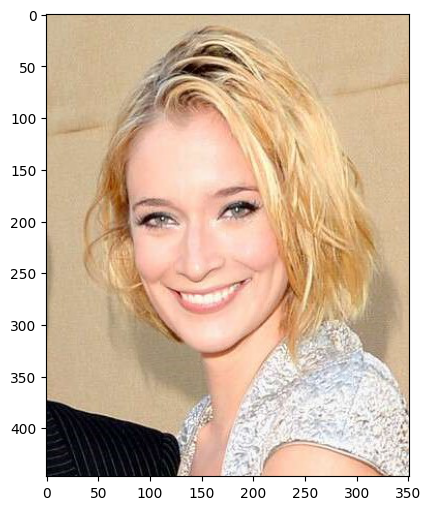

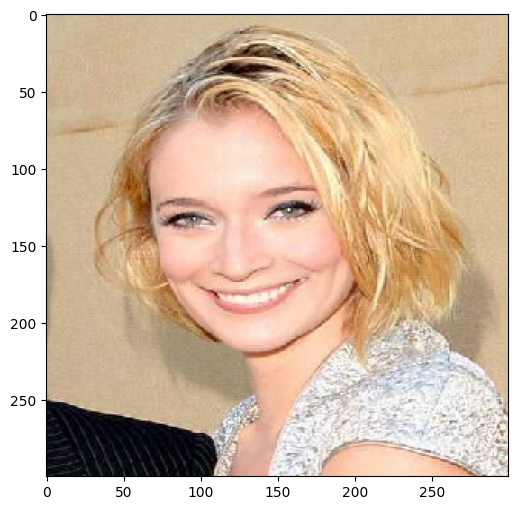

In [ ]:
#Resizing Image

#Loads image in from the set image path
train_heart_dir_sample = os.path.join(train_heart_dir, 'heart (2).jpg')
img_2 = tf.keras.preprocessing.image.load_img(train_heart_dir_sample, target_size=(300, 300))
img = tf.keras.preprocessing.image.load_img(train_heart_dir_sample)
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor_2 = tf.keras.preprocessing.image.img_to_array(img_2)
img_tensor_2 = np.expand_dims(img_tensor_2, axis=0)

#Allows us to properly visualize our image by rescaling values in array
img_tensor /= 255.
img_tensor_2 /= 255.

#Plots image
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img_tensor_2[0])
plt.show()

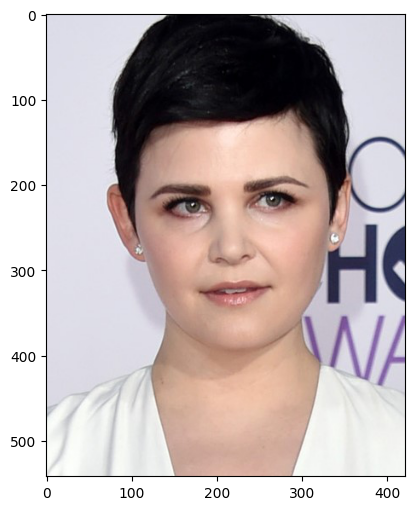

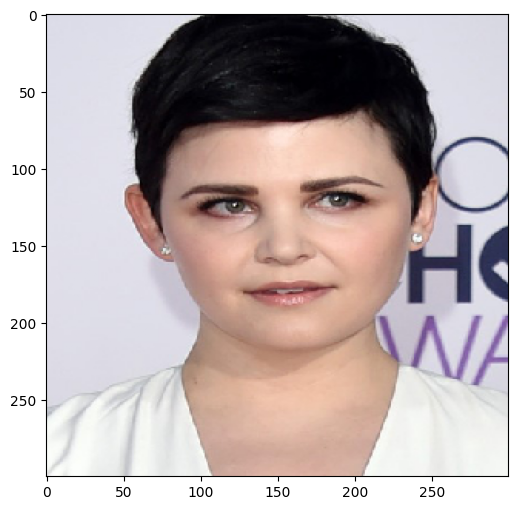

In [ ]:
#Loads image in from the set image path
train_oval_dir_sample = os.path.join(train_round_dir, 'round (9).jpg')
img_2 = tf.keras.preprocessing.image.load_img(train_oval_dir_sample, target_size=(300, 300))
img = tf.keras.preprocessing.image.load_img(train_oval_dir_sample)
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor_2 = tf.keras.preprocessing.image.img_to_array(img_2)
img_tensor_2 = np.expand_dims(img_tensor_2, axis=0)
#Allows us to properly visualize our image by rescaling values in array
img_tensor /= 255.
img_tensor_2 /= 255.
#Plots image
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img_tensor_2[0])
plt.show()

In [ ]:
for image in train_generator:
  print(type(image))
  print(type(image[0]))
  print(image[0].shape)
  # print(image)
  break

<class 'tuple'>
<class 'numpy.ndarray'>
(20, 250, 400, 3)


In [ ]:
train_oval_dir_sample = os.path.join(train_round_dir, 'round (9).jpg')
img = tf.keras.preprocessing.image.load_img(train_oval_dir_sample)
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
print(img_tensor.shape)

img_tensor_gs = tf.image.rgb_to_grayscale(img_tensor) #grayscale image
print(img_tensor_gs.shape)

(542, 421, 3)
(542, 421, 1)


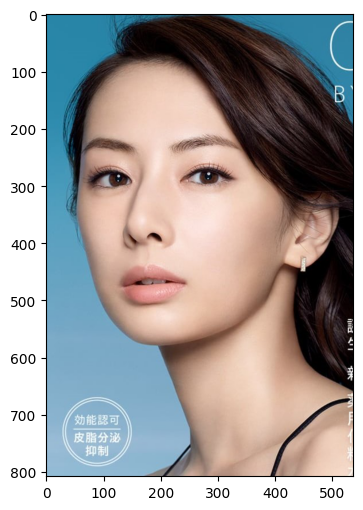

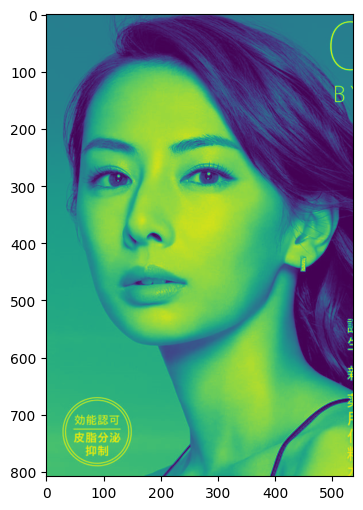

In [ ]:
#Grayscaled Image Conversion [on work!]
#https://www.tensorflow.org/api_docs/python/tf/image/rgb_to_grayscale

train_oval_dir_sample = os.path.join(train_round_dir, 'round (140).jpg')
img = tf.keras.preprocessing.image.load_img(train_oval_dir_sample)
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

#Plots original image
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

#grayscaled image
img = tf.keras.preprocessing.image.load_img(train_oval_dir_sample)
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor_gs = tf.image.rgb_to_grayscale(img_tensor) #grayscale image
img_tensor_gs = np.expand_dims(img_tensor_gs, axis=0) #/ 255

#Plots original image
plt.figure(figsize=(6,6))
plt.imshow(img_tensor_gs[0])
plt.show()

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_oval_dir_sample = os.path.join(train_round_dir, 'round (9).jpg')
img = tf.keras.preprocessing.image.load_img(train_oval_dir_sample)
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

(330, 400)
330


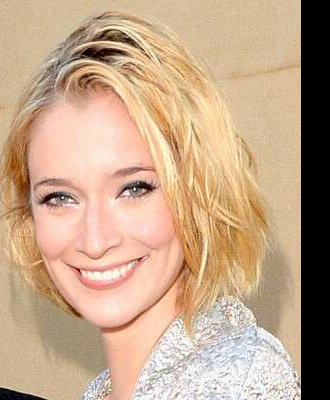

In [ ]:
image = Image.open(train_heart_dir_sample)
box = (50, 0, 380, 400)
cropped_image = image.crop(box)
# cropped_image.save('cropped_image.jpg')

# Print size of cropped image
print(cropped_image.size) # Output: (500, 300)
print(cropped_image.size[0])
cropped_image.show()

In [ ]:
#Test Image Tensor Shape
train_oval_dir_sample = os.path.join(train_round_dir, 'round (9).jpg')
img = tf.keras.preprocessing.image.load_img(train_oval_dir_sample)
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor /= 255.

#Plots original image
# plt.figure(figsize=(6,6))
# plt.imshow(img_tensor[0])
# plt.show()
img_tensor.shape

(542, 421, 3)

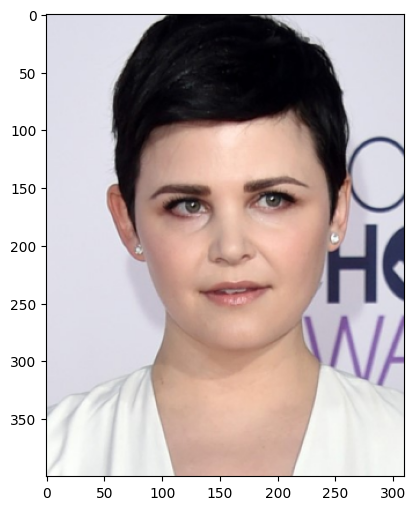

In [ ]:
#Resizing Image [FINAL]
image = cv2.imread(train_oval_dir_sample)
image_2 = image_resize(image, height = 400)
RGB_img = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
# print(image_2)
# img_tensor = np.expand_dims(image_2, axis=0)
img_tensor = np.expand_dims(RGB_img, axis=0)
# img_tensor /= 255
# print(RGB_img)
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

# Image Preprocessing

## For Default (73-27) Proportion

In [ ]:
#Deleting Wrong Files on Cropped Image Data Directory [RUN ONCE ONLY!]
#Un-comment code lines below to run

# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Round"))
# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Square"))
# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Oblong"))
# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Heart"))
# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Oval"))

In [ ]:
# #FOR CROPPING TRAINING DATA, SAVED TO CROPPED TRAINING DATA FOLDER
# cropped_img(test_round_dir, "Round", test_dir_scaled_cropped)
# print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Round"))))
# cropped_img(test_heart_dir, "Heart", test_dir_scaled_cropped)
# print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Heart"))))
# cropped_img(test_oblong_dir, "Oblong", test_dir_scaled_cropped)
# print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Oblong"))))
# cropped_img(test_oval_dir, "Oval", test_dir_scaled_cropped)
# print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Oval"))))
# cropped_img(test_square_dir, "Square", test_dir_scaled_cropped)
# print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Square"))))

800
800
oblong (724).jpg
799
800
800


In [ ]:
test_dir_scaled_cropped

'/content/drive/MyDrive/FACEshape_copy/testing_set'

In [ ]:
#FOR CROPPING TEST DATA, SAVED TO CROPPED TESTING DATA FOLDER
cropped_img(test_round_dir, "Round", test_dir_scaled_cropped)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Round"))))
cropped_img(test_heart_dir, "Heart", test_dir_scaled_cropped)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Heart"))))
cropped_img(test_oblong_dir, "Oblong", test_dir_scaled_cropped)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Oblong"))))
cropped_img(test_oval_dir, "Oval", test_dir_scaled_cropped)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Oval"))))
cropped_img(test_square_dir, "Square", test_dir_scaled_cropped)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped, "Square"))))

desktop.ini
300
300
300
300
300


## For 80-20 Proportion

### Adding Cropped Images to Directory

In [ ]:
#Deleting Wrong Files on Cropped Image Data Directory [RUN ONCE ONLY!]
#Un-comment code lines below to run

# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Round"))
# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Square"))
# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Oblong"))
# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Heart"))
# delete_wrong_files(os.path.join(train_dir_scaled_cropped, "Oval"))

In [ ]:
#FOR CROPPING TRAINING DATA, SAVED TO CROPPED TRAINING DATA FOLDER
cropped_img(train_round_dir, "Round", train_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(train_dir_scaled_cropped2, "Round"))))
cropped_img(train_round_dir, "Heart", train_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(train_dir_scaled_cropped2, "Heart"))))
cropped_img(train_round_dir, "Oblong", train_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(train_dir_scaled_cropped2, "Oblong"))))
cropped_img(train_round_dir, "Oval", train_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(train_dir_scaled_cropped2, "Oval"))))
cropped_img(train_round_dir, "Square", train_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(train_dir_scaled_cropped2, "Square"))))

800
800
800
800
800


In [ ]:
test_dir_scaled_cropped2

'/content/drive/MyDrive/FACEshape_copy_80_20/testing_set'

In [ ]:
#FOR CROPPING TEST DATA, SAVED TO CROPPED TESTING DATA FOLDER
cropped_img(test_round_dir, "Round", test_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped2, "Round"))))
cropped_img(test_heart_dir, "Heart", test_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped2, "Heart"))))
cropped_img(test_oblong_dir, "Oblong", test_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped2, "Oblong"))))
cropped_img(test_oval_dir, "Oval", test_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped2, "Oval"))))
cropped_img(test_square_dir, "Square", test_dir_scaled_cropped2)
print(len(os.listdir(os.path.join(test_dir_scaled_cropped2, "Square"))))

desktop.ini
300
300
300
300
300


### Move some Image from Test to Train Directory

In [ ]:
#get number to convert from each classes
perc_of_test = 0.2 #changable

train_cropped_dirs = [train_heart_dir_cropped2,
                      train_oblong_dir_cropped2,
                      train_oval_dir_cropped2,
                      train_round_dir_cropped2,
                      train_square_dir_cropped2]
test_cropped_dirs = [test_heart_dir_cropped2,
                     test_oblong_dir_cropped2,
                     test_oval_dir_cropped2,
                     test_round_dir_cropped2,
                     test_square_dir_cropped2]
number_of_classes = len(os.listdir(test_dir_scaled_cropped))


total_training_data = np.array([len(os.listdir(dir)) for dir in train_cropped_dirs]).sum()
total_testing_data = np.array([len(os.listdir(dir)) for dir in test_cropped_dirs]).sum()
total_data =total_training_data + total_testing_data

num_to_convert_each_class = int(round((total_testing_data - total_data * perc_of_test) / number_of_classes , 0))
num_to_convert #number to convert from each classes

80

In [ ]:
'img_no_30.jpg' in os.listdir(test_heart_dir_cropped)
[len(os.listdir(dir)) for dir in test_cropped_dirs]

[0, 0, 0, 0, 0]

In [ ]:
#random sampling filenames to be moved for each classes from test data
random.seed(41)
random_sampling = tuple([random.sample(os.listdir(dir), num_to_convert) for dir in test_cropped_dirs])

In [ ]:
#Get File Name To Copy
names = ['heart', 'oblong', 'oval', 'round', 'square']

for i, name in enumerate(names) :
  txt_filename = name + '.txt'
  with open(txt_filename, 'w') as f :
    f.write('\n'.join(random_sampling[i]))

In [ ]:
#Copy File
txt_filenames = [name + '.txt' for name in names]
txt_filenames

copy_file_dirs = []
for txt_file in txt_filenames :
  copy_file_dir = []
  with open(txt_file, 'r') as f :
    temps = f.readlines()
    temps = [temp.strip('\n') for temp in temps]
  copy_file_dirs.append(temps)

copy_file_dirs

[['heart (505).jpg',
  'heart (452).jpg',
  'heart (13).jpg',
  'img_no_7.jpg',
  'heart (788).jpg',
  'heart (986).jpg',
  'heart (194).jpg',
  'heart (787).jpg',
  'heart (189).jpg',
  'heart (395).jpg',
  'img_no_30.jpg',
  'heart (237).jpg',
  'img_no_94.jpg',
  'heart (553).jpg',
  'img_no_96.jpg',
  'img_no_79.jpg',
  'heart (271).jpg',
  'heart (203).jpg',
  'heart (929).jpg',
  'img_no_76.jpg',
  'img_no_72.jpg',
  'img_no_15.jpg',
  'heart (767).jpg',
  'heart (294).jpg',
  'heart (334).jpg',
  'img_no_43.jpg',
  'heart (913).jpg',
  'heart (433).jpg',
  'img_no_19.jpg',
  'heart (661).jpg',
  'img_no_23.jpg',
  'img_no_45.jpg',
  'img_no_55.jpg',
  'img_no_85.jpg',
  'img_no_58.jpg',
  'heart (192).jpg',
  'heart (336).jpg',
  'heart (344).jpg',
  'img_no_66.jpg',
  'img_no_38.jpg',
  'heart (592).jpg',
  'img_no_1.jpg',
  'heart (282).jpg',
  'heart (892).jpg',
  'img_no_13.jpg',
  'img_no_49.jpg',
  'img_no_5.jpg',
  'heart (7).jpg',
  'img_no_61.jpg',
  'heart (919).jpg',


In [ ]:
# revise test directory
test_cropped_dirs = [dir +'/' for dir in test_cropped_dirs]
test_cropped_dirs

# revise train directory
train_cropped_dirs = [dir +'/' for dir in train_cropped_dirs]
train_cropped_dirs

['/content/drive/MyDrive/FACEshape_copy_80_20/training_set/Heart/',
 '/content/drive/MyDrive/FACEshape_copy_80_20/training_set/Oblong/',
 '/content/drive/MyDrive/FACEshape_copy_80_20/training_set/Oval/',
 '/content/drive/MyDrive/FACEshape_copy_80_20/training_set/Round/',
 '/content/drive/MyDrive/FACEshape_copy_80_20/training_set/Square/']

In [ ]:
#copy and remove file
success_copied = 0
success_deleted = 0
error_copied = 0
error_deleted = 0

for i, filetype in enumerate(copy_file_dirs) :
  for file in filetype:
    src_path = test_cropped_dirs[i] + file
    dst_path = train_cropped_dirs[i] + file

    try:
      shutil.copy(src_path, dst_path)
      success_copied += 1
      try:
        os.remove(src_path)
        success_deleted += 1
      except :
        error_deleted += 1

    # If source and destination are same
    except shutil.SameFileError:
      print("Source and destination represents the same file.")
      error_copied += 1

In [ ]:
for file in copy_file_dirs[0]:
  src_path = test_cropped_dirs[0] + file
  dst_path = train_cropped_dirs[0] + file
  try:
    shutil.copy(src_path, dst_path)
    success_copied += 1
    try:
      os.remove(src_path)
      success_deleted += 1
    except :
      error_deleted += 1

  # If source and destination are same
  except shutil.SameFileError:
    print("Source and destination represents the same file.")
    error_copied += 1

In [ ]:
print(f'Success Copied: {success_copied}')
print(f'Success Deleted: {success_deleted}')
print(f'Error Copied: {error_copied}')
print(f'Error Deleted: {error_deleted}')

print(f'\nNumber of image in each train dir:')
for dir in train_cropped_dirs:
  print(len(os.listdir(dir)))
print(f'\nNumber of image in each test dir:')
for dir in test_cropped_dirs:
  print(len(os.listdir(dir)))

Success Copied: 400
Success Deleted: 400
Error Copied: 0
Error Deleted: 0

Number of image in each train dir:
880
880
880
880
880

Number of image in each test dir:
220
220
220
220
220


# Modeling
**COPY NOTEBOOK TO RUN MODEL!**


# Testing Model

In [ ]:
#load saved model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model_filename = 'model_tl_inception_type2.h5'
model = load_model(model_path + model_filename)

In [ ]:
def test_data_prep(class_name, img_filename, dir) :
  #filename = 'heart (101).jpg'
  img_sample  = dir + '/'+ class_name +'/' + img_filename
  img_sample = tf.keras.preprocessing.image.load_img(img_sample, target_size=(250, 400))
  #print(img_sample.shape)
  img_sample_tensor = tf.keras.preprocessing.image.img_to_array(img_sample)
  #print(img_sample_tensor.shape)
  img_sample_final = np.expand_dims(img_sample_tensor, axis=0)
  #print(img_sample_final.shape)


  #Allows us to properly visualize our image by rescaling values in array
  img_sample_final /= 255. #normalization (range 0 to 1)
  return(img_sample_final)

# sample_test_image = test_data_prep('heart (101).jpg')

In [ ]:
test_sample = os.listdir(test_dir_scaled_cropped+'/'+ 'Heart')[0]
temp_image = test_data_prep('Heart', test_sample, test_dir_scaled_cropped2)
model_output = model.predict(temp_image)
model_output

1/1 [==============================] - 2s 2s/step


array([[0.4621629 , 0.1481288 , 0.21008694, 0.0785874 , 0.1010339 ]],
      dtype=float32)

In [ ]:
test_sample = os.listdir(test_dir_scaled_cropped+'/'+ 'Round')[0]
temp_image = test_data_prep('Round', test_sample, test_dir_scaled_cropped2)
model_output = model.predict(temp_image)
model_output

1/1 [==============================] - 0s 199ms/step


array([[0.32700923, 0.1502229 , 0.24989824, 0.14381857, 0.1290511 ]],
      dtype=float32)

In [ ]:
test_sample = os.listdir(test_dir_scaled_cropped+'/'+ 'Round')[1]
temp_image = test_data_prep('Round', test_sample, test_dir_scaled_cropped)
model_output = model.predict(temp_image)
model_output

1/1 [==============================] - 0s 186ms/step


array([[0.27205527, 0.2898956 , 0.22040658, 0.09463718, 0.12300535]],
      dtype=float32)

# FINAL MODEL

## CNN from Scratch
1. 80-20 Train Test Proportion
2. Add some Regularization

In [ ]:
#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped2,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped2,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(250, 400))

Found 4400 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop
# GRADED FUNCTION: create_model
def final_model_1():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 400, 3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(128, activation='relu'),
            # 128 neuron hidden layer
            tf.keras.layers.Dense(64, activation='relu'),
            # Only 1 output neuron. It will contain a value from 0-4
            tf.keras.layers.Dense(5, activation='softmax')
          ])
  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model #return model

In [ ]:
#13.42

final_model1 = final_model_1()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = final_model1.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/15
220/220 [==============================] - 1003s 5s/step - loss: 121.7486 - accuracy: 0.1764 - val_loss: 3.2160 - val_accuracy: 0.1855
Epoch 2/15
220/220 [==============================] - 630s 3s/step - loss: 2.3243 - accuracy: 0.1832 - val_loss: 1.7024 - val_accuracy: 0.2000
Epoch 3/15
220/220 [==============================] - 581s 3s/step - loss: 1.7035 - accuracy: 0.1948 - val_loss: 1.7016 - val_accuracy: 0.2000
Epoch 4/15
220/220 [==============================] - 583s 3s/step - loss: 1.7018 - accuracy: 0.1907 - val_loss: 1.7018 - val_accuracy: 0.2000
Epoch 5/15
220/220 [==============================] - 625s 3s/step - loss: 1.7017 - accuracy: 0.1895 - val_loss: 1.7020 - val_accuracy: 0.2000
Epoch 6/15
220/220 [==============================] - 628s 3s/step - loss: 1.7017 - accuracy: 0.1902 - val_loss: 1.7022 - val_accuracy: 0.2000
Epoch 7/15
220/220 [==============================] - 631s 3s/step - loss: 1.7017 - accuracy: 0.1861 - val_loss: 1.7022 - val_accuracy: 0.1

KeyboardInterrupt: ignored

In [ ]:
#Predicting Model
temp_model = final_model1 #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.04798494 0.32583323 0.20854731 0.14861517 0.26901928]]
1/1 [==============================] - 0s 281ms/step
[[0.07392634 0.4046961  0.11761997 0.09578436 0.30797324]]
1/1 [==============================] - 0s 294ms/step
[[0.07973538 0.31332704 0.19922014 0.2601938  0.14752372]]
1/1 [==============================] - 0s 288ms/step
[[0.08738165 0.39297923 0.1361934  0.11749028 0.2659554 ]]
1/1 [==============================] - 0s 286ms/step
[[0.04318194 0.33874747 0.19703642 0.10643928 0.31459495]]

Testing Sample Predictions:
1/1 [==============================] - 0s 288ms/step
[[0.01870104 0.38705927 0.18440667 0.16380613 0.24602689]]
1/1 [==============================] - 0s 289ms/step
[[0.03519795 0.44559792 0.15854561 0.1598735  0.20078503]]
1/1 [==============================] - 0s 299ms/step
[[0.0454456  0.40030158 0.17761937 0.14989264

In [ ]:
#Saving Model
model_filename = 'final_model1.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
final_model1.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Load Model
model_filename = 'model_tl_inception_type2.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 3s 3s/step
[[0.04798494 0.32583323 0.20854731 0.14861517 0.26901928]]
1/1 [==============================] - 0s 280ms/step
[[0.07392634 0.4046961  0.11761997 0.09578436 0.30797324]]
1/1 [==============================] - 0s 287ms/step
[[0.07973538 0.31332704 0.19922014 0.2601938  0.14752372]]
1/1 [==============================] - 0s 291ms/step
[[0.08738165 0.39297923 0.1361934  0.11749028 0.2659554 ]]
1/1 [==============================] - 0s 277ms/step
[[0.04318194 0.33874747 0.19703642 0.10643928 0.31459495]]

Testing Sample Predictions:
1/1 [==============================] - 0s 287ms/step
[[0.01870104 0.38705927 0.18440667 0.16380613 0.24602689]]
1/1 [==============================] - 0s 286ms/step
[[0.03519795 0.44559792 0.15854561 0.1598735  0.20078503]]
1/1 [==============================] - 0s 281ms/step
[[0.0454456  0.40030158 0.17761937 0.14989264

## INCEPTION MODEL
1. Train Data is Processed
2. Test Data is Processed
3. Mixed7 Layer
4. batch_size = 16

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped2,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped2,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 4400 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-11 08:51:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   184MB/s    in 0.5s    

2023-06-11 08:51:30 (184 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 199, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 199, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.999):
#       print("\nReached 99.9% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:

last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 126,549,925 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 15,
                    verbose = 1
                    # callbacks=callbacks
                    )

Epoch 1/15
275/275 [==============================] - 2002s 7s/step - loss: 825.6241 - accuracy: 0.1811 - val_loss: 579.1030 - val_accuracy: 0.2291
Epoch 2/15
275/275 [==============================] - 1974s 7s/step - loss: 695.6234 - accuracy: 0.1870 - val_loss: 711.9192 - val_accuracy: 0.2073
Epoch 3/15
275/275 [==============================] - 1963s 7s/step - loss: 659.5746 - accuracy: 0.1920 - val_loss: 654.8016 - val_accuracy: 0.2282
Epoch 4/15
275/275 [==============================] - 1952s 7s/step - loss: 647.2374 - accuracy: 0.2009 - val_loss: 462.7256 - val_accuracy: 0.2691
Epoch 5/15
275/275 [==============================] - 1942s 7s/step - loss: 648.7760 - accuracy: 0.1955 - val_loss: 979.3364 - val_accuracy: 0.2009
Epoch 6/15
275/275 [==============================] - 1931s 7s/step - loss: 629.0621 - accuracy: 0.2032 - val_loss: 600.6498 - val_accuracy: 0.2136
Epoch 7/15
275/275 [==============================] - 1938s 7s/step - loss: 626.9037 - accuracy: 0.1993 - val_lo

In [ ]:
#Saving Model
model_filename = 'final_model_tl.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.04798494 0.32583323 0.20854731 0.14861517 0.26901928]]
1/1 [==============================] - 0s 281ms/step
[[0.07392634 0.4046961  0.11761997 0.09578436 0.30797324]]
1/1 [==============================] - 0s 294ms/step
[[0.07973538 0.31332704 0.19922014 0.2601938  0.14752372]]
1/1 [==============================] - 0s 288ms/step
[[0.08738165 0.39297923 0.1361934  0.11749028 0.2659554 ]]
1/1 [==============================] - 0s 286ms/step
[[0.04318194 0.33874747 0.19703642 0.10643928 0.31459495]]

Testing Sample Predictions:
1/1 [==============================] - 0s 288ms/step
[[0.01870104 0.38705927 0.18440667 0.16380613 0.24602689]]
1/1 [==============================] - 0s 289ms/step
[[0.03519795 0.44559792 0.15854561 0.1598735  0.20078503]]
1/1 [==============================] - 0s 299ms/step
[[0.0454456  0.40030158 0.17761937 0.14989264

In [ ]:
#Load Model
model_filename = 'model_tl_inception_type2.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 3s 3s/step
[[0.04798494 0.32583323 0.20854731 0.14861517 0.26901928]]
1/1 [==============================] - 0s 280ms/step
[[0.07392634 0.4046961  0.11761997 0.09578436 0.30797324]]
1/1 [==============================] - 0s 287ms/step
[[0.07973538 0.31332704 0.19922014 0.2601938  0.14752372]]
1/1 [==============================] - 0s 291ms/step
[[0.08738165 0.39297923 0.1361934  0.11749028 0.2659554 ]]
1/1 [==============================] - 0s 277ms/step
[[0.04318194 0.33874747 0.19703642 0.10643928 0.31459495]]

Testing Sample Predictions:
1/1 [==============================] - 0s 287ms/step
[[0.01870104 0.38705927 0.18440667 0.16380613 0.24602689]]
1/1 [==============================] - 0s 286ms/step
[[0.03519795 0.44559792 0.15854561 0.1598735  0.20078503]]
1/1 [==============================] - 0s 281ms/step
[[0.0454456  0.40030158 0.17761937 0.14989264

## VGG16


In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped2,
                                                    batch_size = 32,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped2,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 4400 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
# base_model = VGG16(weights="imagenet", include_top=False, input_shape=(250, 400, 3))
# base_model.trainable = False ## Not trainable weights

base_model = VGG16(input_shape = (250, 400, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 250, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 200, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 100, 128)      0   

In [ ]:
vgghist = model.fit(train_generator,
                    validation_data = test_generator,
                    verbose = 1,
                    epochs = 5)
#17.09

Epoch 1/5
 87/138 [=================>............] - ETA: 29:59 - loss: 8.0438 - acc: 0.1667

## Model From Scratch (CNN)
Condition 1 :
1. Train Data is Pre-Processed
2. Test Data is Not Pre-Processed

### Model Init

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 400, 3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            # 128 neuron hidden layer
            tf.keras.layers.Dense(128, activation='relu'),
            # 32 neuron hidden layer
            tf.keras.layers.Dense(32, activation='relu'),
            # Add dropouot layer
            tf.keras.layers.Dropout(0.01),
            # Only 1 output neuron. It will contain a value from 0-4
            tf.keras.layers.Dense(5, activation='softmax')
          ])

  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model #return model

In [ ]:
train_heart_dir_sample = os.path.join(train_heart_dir, 'heart (1).jpg')
img = tf.keras.preprocessing.image.load_img(train_heart_dir_sample, target_size=(250, 400))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
model = create_model()
model_output = model.predict(img_tensor)
print(model_output)

1/1 [==============================] - 1s 694ms/step
[[0.1997979  0.1985661  0.20059115 0.20011315 0.20093171]]


In [ ]:
path = 'Models/FaceShape/'
filename = 'model.h5'
model.save(path + filename)

In [ ]:
from keras.models import load_model
model_path = '/content/Models/FaceShape/model.h5'
model_loaded = load_model(model_path)

In [ ]:
train_heart_dir_sample = os.path.join(train_heart_dir, 'heart (8).jpg')
img = tf.keras.preprocessing.image.load_img(train_heart_dir_sample, target_size=(250, 400))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [ ]:
model_output = model_loaded.predict(img_tensor)
print(model_output)

1/1 [==============================] - 0s 432ms/step
[[0.20464031 0.1997422  0.20827696 0.19248013 0.19486032]]


In [ ]:
train_heart_dir_sample = os.path.join(train_heart_dir, 'heart (1).jpg')
img = tf.keras.preprocessing.image.load_img(train_heart_dir_sample, target_size=(250, 400))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
model = create_model()
model_output = model.predict(img_tensor)
print(model_output)

1/1 [==============================] - 0s 234ms/step
[[0.20617592 0.19458765 0.19787055 0.19498043 0.20638542]]


In [ ]:
train_heart_dir_sample = os.path.join(train_heart_dir, 'heart (12).jpg')
img = tf.keras.preprocessing.image.load_img(train_heart_dir_sample, target_size=(250, 400))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
model = create_model()
model_output = model.predict(img_tensor)
print(model_output)

1/1 [==============================] - 0s 158ms/step
[[0.20229746 0.19431914 0.18047224 0.21735144 0.20555975]]


In [ ]:
# from PIL import ImageFile
model = create_model()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/15
200/200 [==============================] - 637s 3s/step - loss: 32.7802 - accuracy: 0.2373 - val_loss: 1.6066 - val_accuracy: 0.2127
Epoch 2/15
200/200 [==============================] - 601s 3s/step - loss: 1.8477 - accuracy: 0.2091 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 3/15
200/200 [==============================] - 597s 3s/step - loss: 1.6098 - accuracy: 0.1980 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 4/15
200/200 [==============================] - 594s 3s/step - loss: 1.6097 - accuracy: 0.2001 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/15
200/200 [==============================] - 608s 3s/step - loss: 1.6096 - accuracy: 0.1893 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 6/15
200/200 [==============================] - 598s 3s/step - loss: 1.6097 - accuracy: 0.1933 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 7/15
200/200 [==============================] - 601s 3s/step - loss: 1.6096 - accuracy: 0.1888 - val_loss: 1.6094 - val_accuracy: 0.200

### Model 2

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# GRADED FUNCTION: create_model
def create_model2():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 400, 3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(64, activation='relu'),
            # 128 neuron hidden layer
            tf.keras.layers.Dense(32, activation='relu'),
            # Only 1 output neuron. It will contain a value from 0-4
            tf.keras.layers.Dense(5, activation='softmax')
          ])
  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model #return model

In [ ]:
#21.34

model2 = create_model2()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = model2.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/15
200/200 [==============================] - 1434s 7s/step - loss: 27.7975 - accuracy: 0.2388 - val_loss: 3.1728 - val_accuracy: 0.1973
Epoch 2/15
 39/200 [====>.........................] - ETA: 6:08 - loss: 4.3122 - accuracy: 0.2731

KeyboardInterrupt: ignored

In [ ]:
#Predicting Model
temp_model = model2 #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 95ms/step
[[0.1934437  0.18732354 0.20248462 0.19257118 0.22417699]]
1/1 [==============================] - 0s 95ms/step
[[0.19316603 0.18723263 0.20301524 0.19180958 0.22477654]]
1/1 [==============================] - 0s 77ms/step
[[0.19367228 0.18909758 0.20183316 0.19213957 0.22325736]]
1/1 [==============================] - 0s 81ms/step
[[0.19088341 0.18576156 0.20380653 0.19187252 0.22767602]]
1/1 [==============================] - 0s 79ms/step
[[0.19333693 0.18662234 0.20321563 0.19108029 0.2257448 ]]

Testing Sample Predictions:
1/1 [==============================] - 0s 89ms/step
[[0.19671886 0.19213359 0.20120971 0.19370922 0.21622851]]
1/1 [==============================] - 0s 77ms/step
[[0.19657314 0.19400279 0.20134762 0.19408439 0.21399209]]
1/1 [==============================] - 0s 76ms/step
[[0.1930859  0.18819775 0.20266755 0.1915025  0.22

In [ ]:
#Saving Model
# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
filename = 'model_type2_cond1_testing.h5'
model2.save(model_path + filename)

In [ ]:
#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model_filename = 'model_type2_cond1_testing.h5'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting from Loaded Model
#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 51ms/step
[[0.1934437  0.18732354 0.20248462 0.19257118 0.22417699]]
1/1 [==============================] - 0s 44ms/step
[[0.19316603 0.18723263 0.20301524 0.19180958 0.22477654]]
1/1 [==============================] - 0s 47ms/step
[[0.19367228 0.18909758 0.20183316 0.19213957 0.22325736]]
1/1 [==============================] - 0s 47ms/step
[[0.19088341 0.18576156 0.20380653 0.19187252 0.22767602]]
1/1 [==============================] - 0s 45ms/step
[[0.19333693 0.18662234 0.20321563 0.19108029 0.2257448 ]]

Testing Sample Predictions:
1/1 [==============================] - 0s 47ms/step
[[0.19671886 0.19213359 0.20120971 0.19370922 0.21622851]]
1/1 [==============================] - 0s 46ms/step
[[0.19657314 0.19400279 0.20134762 0.19408439 0.21399209]]
1/1 [==============================] - 0s 49ms/step
[[0.1930859  0.18819775 0.20266755 0.1915025  0.22

## Model From Scratch (CNN)
Condition 2 :
1. Train Data is Pre-Processed
2. Test Data is Pre-Processed

### Model 1

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
# GRADED FUNCTION: create_model
def create_model2():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 400, 3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(64, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.2),
            # 128 neuron hidden layer
            tf.keras.layers.Dense(32, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.2),
            # Only 1 output neuron. It will contain a value from 0-4
            tf.keras.layers.Dense(5, activation='softmax'),
          ])
  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model #return model

In [ ]:
#21.34

model2_2 = create_model2()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = model2_2.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/10
63/63 [==============================] - 907s 14s/step - loss: 213.5676 - accuracy: 0.2051 - val_loss: 4.8693 - val_accuracy: 0.2000
Epoch 2/10
63/63 [==============================] - 440s 7s/step - loss: 9.6286 - accuracy: 0.1995 - val_loss: 4.1836 - val_accuracy: 0.2000
Epoch 3/10
63/63 [==============================] - 438s 7s/step - loss: 3.8472 - accuracy: 0.1883 - val_loss: 3.3696 - val_accuracy: 0.2000
Epoch 4/10
63/63 [==============================] - 413s 7s/step - loss: 2.7785 - accuracy: 0.1920 - val_loss: 2.2123 - val_accuracy: 0.2000
Epoch 5/10
63/63 [==============================] - 449s 7s/step - loss: 1.8824 - accuracy: 0.1910 - val_loss: 1.6854 - val_accuracy: 0.2000
Epoch 6/10
63/63 [==============================] - 402s 6s/step - loss: 1.7099 - accuracy: 0.1928 - val_loss: 1.6921 - val_accuracy: 0.2000
Epoch 7/10
63/63 [==============================] - ETA: 0s - loss: 1.6919 - accuracy: 0.1895

In [ ]:
#Predicting Model
temp_model = model2_2 #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 137ms/step
[[0.30703616 0.0879728  0.3121071  0.13726057 0.15562348]]
1/1 [==============================] - 0s 46ms/step
[[0.2957509  0.0916744  0.30763733 0.14779156 0.15714583]]
1/1 [==============================] - 0s 47ms/step
[[0.30750585 0.08813764 0.29772052 0.15365775 0.15297817]]
1/1 [==============================] - 0s 51ms/step
[[0.30127153 0.07956365 0.31959912 0.15326953 0.14629614]]
1/1 [==============================] - 0s 50ms/step
[[0.3008961  0.08499166 0.30927435 0.15032499 0.15451294]]

Testing Sample Predictions:
1/1 [==============================] - 0s 49ms/step
[[0.27568325 0.12884243 0.28864086 0.1556844  0.15114906]]
1/1 [==============================] - 0s 50ms/step
[[0.28229925 0.10880847 0.29603335 0.16932344 0.1435355 ]]
1/1 [==============================] - 0s 46ms/step
[[0.30115232 0.08245925 0.3041087  0.15915523 0.1

In [ ]:
#Saving Model
model_filename = 'model_cond2_type2.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model2_2.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting from Loaded Model
#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 114ms/step
[[0.30703616 0.0879728  0.3121071  0.13726057 0.15562348]]
1/1 [==============================] - 0s 53ms/step
[[0.2957509  0.0916744  0.30763733 0.14779156 0.15714583]]
1/1 [==============================] - 0s 44ms/step
[[0.30750585 0.08813764 0.29772052 0.15365775 0.15297817]]
1/1 [==============================] - 0s 44ms/step
[[0.30127153 0.07956365 0.31959912 0.15326953 0.14629614]]
1/1 [==============================] - 0s 44ms/step
[[0.3008961  0.08499166 0.30927435 0.15032499 0.15451294]]

Testing Sample Predictions:
1/1 [==============================] - 0s 45ms/step
[[0.27568325 0.12884243 0.28864086 0.1556844  0.15114906]]
1/1 [==============================] - 0s 45ms/step
[[0.28229925 0.10880847 0.29603335 0.16932344 0.1435355 ]]
1/1 [==============================] - 0s 48ms/step
[[0.30115232 0.08245925 0.3041087  0.15915523 0.1

### Checking Model Performances Based on Training and Testing Data Manually

In [ ]:
# CHECK TRAINING PERFORMANCES
def get_manual_checked_results(train_dir_scaled_cropped, loaded_model) :
  proba_values_train = []
  true_class_output_train = []
  pred_class_output_train = []
  img_output_train = []
  classes = os.listdir(train_dir_scaled_cropped)
  print(f'Classes: {classes}')

  for i, class_ in enumerate(classes) :
    filenames = os.listdir(train_dir_scaled_cropped+'/'+ class_)
    for filename in filenames :
      temp_image = sample_image_prep(train_dir_scaled_cropped +'/'+ class_, filename)
      model_output = loaded_model.predict(temp_image)

      #append outputs
      img_output_train.append(temp_image)
      true_class_output_train.append(i)
      proba_values_train.append(model_output)
      pred_class_output_train.append(model_output.argmax())

  return(img_output_train, #image values
         true_class_output_train, #true class value
         proba_values_train, #prediction probability values
         pred_class_output_train #prediction class values
         )

#### Using Loaded Model

In [ ]:
# CHECK TRAINING PERFORMANCES
proba_values_train = []
true_class_output_train = []
pred_class_output_train = []
img_output_train = []
classes = os.listdir(train_dir_scaled_cropped)
print(f'Classes: {classes}')

for i, class_ in enumerate(classes) :
  filenames = os.listdir(train_dir_scaled_cropped+'/'+ class_)
  for filename in filenames :
    temp_image = sample_image_prep(train_dir_scaled_cropped +'/'+ class_, filename)
    model_output = loaded_model.predict(temp_image)

    #append outputs
    img_output_train.append(temp_image)
    true_class_output_train.append(i)
    proba_values_train.append(model_output)
    pred_class_output_train.append(model_output.argmax())

Classes: ['Heart', 'Round', 'Oval', 'Square', 'Oblong']
1/1 [==============================] - 0s 82ms/step


In [ ]:
# TRAIN DATA PREDICTION RESULTS
train_output_df = pd.DataFrame(np.array(proba_values_train).reshape(np.array(proba_values_train).shape[0],
                                                                  np.array(proba_values_train).shape[2]), columns = classes)
train_output_df['prediction'] = pd.Series(pred_class_output_train)
train_output_df['true_val'] = true_class_output_train
train_output_df['correct_prediction'] = train_output_df.apply(lambda row : row['prediction'] == row['true_val'], axis = 1)
train_output_df.describe()

Heart        Round         Oval       Square       Oblong  \
count  3999.000000  3999.000000  3999.000000  3999.000000  3999.000000   
mean      0.297642     0.095292     0.301776     0.152979     0.152311   
std       0.011532     0.013343     0.009460     0.007656     0.007496   
min       0.257769     0.064724     0.263693     0.121917     0.112171   
25%       0.291163     0.086202     0.296196     0.148112     0.148166   
50%       0.298534     0.090938     0.302563     0.152673     0.152978   
75%       0.304571     0.101492     0.308091     0.157572     0.157139   
max       0.350859     0.133271     0.346145     0.183639     0.181482   

        prediction     true_val  
count  3999.000000  3999.000000  
mean      1.324831     1.999500  
std       0.945890     1.414213  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       2.000000     2.000000  
75%       2.000000     3.000000  
max       2.000000     4.000000

ACCURACY SCORE : 0.22280570142535633


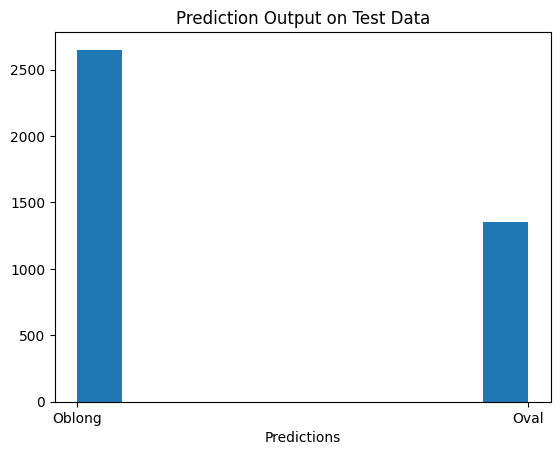

In [ ]:
print(f"ACCURACY SCORE : {train_output_df[train_output_df['correct_prediction'] == True].shape[0] / train_output_df.shape[0]}")
plt.hist(train_output_df['prediction'].apply(lambda row : os.listdir(train_dir_scaled_cropped)[row] ))
#plt.xticks(np.arange(0,5))
plt.xlabel('Predictions')
plt.title('Prediction Output on Test Data')
plt.show()

In [ ]:
train_output_df

NameError: ignored

In [ ]:
# CHECK TESTING PERFORMANCES
proba_values_test = []
true_class_output_test = []
pred_class_output_test = []
img_output_test = []
classes = os.listdir(test_dir_scaled_cropped)
print(f'Classes: {classes}')

for i, class_ in enumerate(classes) :
  filenames = os.listdir(test_dir_scaled_cropped+'/'+ class_)
  for filename in filenames :
    temp_image = sample_image_prep(test_dir_scaled_cropped +'/'+ class_, filename)
    model_output = loaded_model.predict(temp_image)

    #append outputs
    img_output_test.append(temp_image)
    true_class_output_test.append(i)
    proba_values_test.append(model_output)
    pred_class_output_test.append(model_output.argmax())

Classes: ['Heart', 'Round', 'Oval', 'Square', 'Oblong']
1/1 [==============================] - 0s 75ms/step


In [ ]:
# TEST DATA PREDICTION RESULTS
test_output_df = pd.DataFrame(np.array(proba_values_test).reshape(np.array(proba_values_test).shape[0],
                                                                  np.array(proba_values_test).shape[2]), columns = classes)
test_output_df['prediction'] = pd.Series(list(np.array(proba_values_test).reshape(np.array(proba_values_test).shape[0],
                                                                                  np.array(proba_values_test).shape[2]))).apply(lambda row : row.argmax())
test_output_df['true_val'] = true_class_output_test
test_output_df['correct_prediction'] = test_output_df.apply(lambda row : row['prediction'] == row['true_val'], axis = 1)
test_output_df.describe()

Heart        Round         Oval       Square       Oblong  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.297736     0.095624     0.302190     0.153228     0.151221   
std       0.012430     0.014215     0.010170     0.008268     0.007881   
min       0.258102     0.066164     0.268425     0.121917     0.115192   
25%       0.290955     0.085539     0.296102     0.148087     0.146813   
50%       0.298371     0.091065     0.302956     0.153064     0.151757   
75%       0.305461     0.102984     0.308798     0.158387     0.156282   
max       0.339466     0.132658     0.334625     0.183858     0.175924   

        prediction     true_val  
count  1500.000000  1500.000000  
mean      1.334667     2.000000  
std       0.942651     1.414685  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       2.000000     2.000000  
75%       2.000000     3.000000  
max       2.000000     4.000000

ACCURACY SCORE : 0.21733333333333332


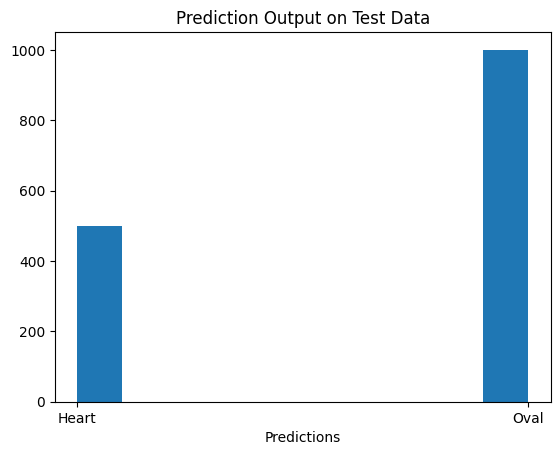

In [ ]:
print(f"ACCURACY SCORE : {test_output_df[test_output_df['correct_prediction'] == True].shape[0] / test_output_df.shape[0]}")
plt.hist(test_output_df['prediction'].apply(lambda row : os.listdir(test_dir_scaled_cropped)[row] ))
#plt.xticks(np.arange(0,5))
plt.xlabel('Predictions')
plt.title('Prediction Output on Test Data')
plt.show()

In [ ]:
test_output_df[test_output_df['correct_prediction'] == True].shape[0] / test_output_df.shape[0]

0.21733333333333332

### Model 2

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
# GRADED FUNCTION: create_model
def create_model2():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 400, 3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(64, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.2),
            # 128 neuron hidden layer
            tf.keras.layers.Dense(32, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.2),
            # Only 1 output neuron. It will contain a value from 0-4
            tf.keras.layers.Dense(5, activation='softmax'),
          ])
  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model #return model

In [ ]:
#21.34

model2_2 = create_model2()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = model2_2.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/10
63/63 [==============================] - 907s 14s/step - loss: 213.5676 - accuracy: 0.2051 - val_loss: 4.8693 - val_accuracy: 0.2000
Epoch 2/10
63/63 [==============================] - 440s 7s/step - loss: 9.6286 - accuracy: 0.1995 - val_loss: 4.1836 - val_accuracy: 0.2000
Epoch 3/10
63/63 [==============================] - 438s 7s/step - loss: 3.8472 - accuracy: 0.1883 - val_loss: 3.3696 - val_accuracy: 0.2000
Epoch 4/10
63/63 [==============================] - 413s 7s/step - loss: 2.7785 - accuracy: 0.1920 - val_loss: 2.2123 - val_accuracy: 0.2000
Epoch 5/10
63/63 [==============================] - 449s 7s/step - loss: 1.8824 - accuracy: 0.1910 - val_loss: 1.6854 - val_accuracy: 0.2000
Epoch 6/10
63/63 [==============================] - 402s 6s/step - loss: 1.7099 - accuracy: 0.1928 - val_loss: 1.6921 - val_accuracy: 0.2000
Epoch 7/10
63/63 [==============================] - 448s 7s/step - loss: 1.6919 - accuracy: 0.1895 - val_loss: 1.6846 - val_accuracy: 0.2000
Epoch 8/10

In [ ]:
#Predicting Model
temp_model = model2_2 #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


NameError: ignored

In [ ]:
#Saving Model
model_filename = 'model_cond2_type1.h5'

# Save Model
# model_path = '/content/drive/MyDrive/Models/FaceShape/'
# model2_2.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting from Loaded Model
#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 456ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 71ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 74ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 72ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 75ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]

Testing Sample Predictions:
1/1 [==============================] - 0s 48ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 45ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 45ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.2

### Checking Model Performances Based on Training and Testing Data Manually

#### Using Loaded Model

In [ ]:
# CHECK TRAINING PERFORMANCES
#proba_values_train, true_class_output_train, pred_class_output_train, img_output_train  = get_manual_checked_results(train_dir_scaled_cropped, model2_2)
#loaded_proba_values_train, loaded_true_class_output_train, loaded_pred_class_output_train, loaded_img_output_train  = get_manual_checked_results(train_dir_scaled_cropped, loaded_model)
loaded_proba_values_train, loaded_true_class_output_train, loaded_pred_class_output_train, loaded_img_output_train  = get_manual_checked_results(test_dir_scaled_cropped, loaded_model)


Classes: ['Round', 'Oval', 'Square', 'Oblong', 'Heart']
1/1 [==============================] - 0s 43ms/step


In [ ]:
# TRAIN DATA PREDICTION RESULTS
#train_pred_output_df = get_prediction_output_df(proba_values_train, true_class_output_train, pred_class_output_train, img_output_train)
loaded_train_pred_output_df = get_prediction_output_df(loaded_proba_values_train, loaded_true_class_output_train, loaded_pred_class_output_train, loaded_img_output_train, os.listdir(train_dir_scaled_cropped))

In [ ]:
train_pred_output_df.describe()

In [ ]:
loaded_train_pred_output_df.describe()

Oval        Heart       Oblong       Square        Round  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.199549     0.199055     0.201279     0.199493     0.200624   
std       0.000000     0.000000     0.000000     0.000000     0.000000   
min       0.199549     0.199055     0.201279     0.199493     0.200624   
25%       0.199549     0.199055     0.201279     0.199493     0.200624   
50%       0.199549     0.199055     0.201279     0.199493     0.200624   
75%       0.199549     0.199055     0.201279     0.199493     0.200624   
max       0.199549     0.199055     0.201279     0.199493     0.200624   

       prediction     true_val  
count      1500.0  1500.000000  
mean          2.0     2.000000  
std           0.0     1.414685  
min           2.0     0.000000  
25%           2.0     1.000000  
50%           2.0     2.000000  
75%           2.0     3.000000  
max           2.0     4.000000

ACCURACY SCORE : 0.22280570142535633


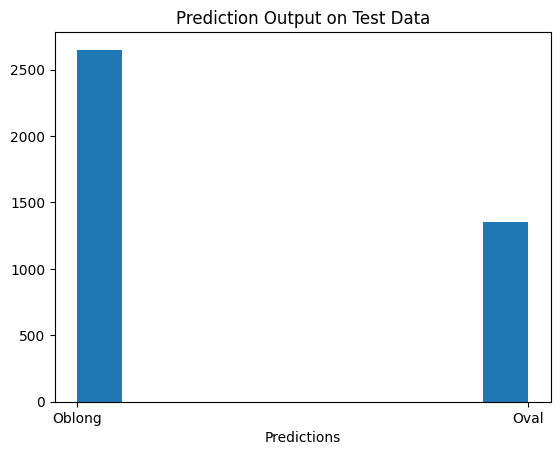

In [ ]:
print(f"ACCURACY SCORE : {train_output_df[train_output_df['correct_prediction'] == True].shape[0] / train_output_df.shape[0]}")
plt.hist(train_output_df['prediction'].apply(lambda row : os.listdir(train_dir_scaled_cropped)[row] ))
#plt.xticks(np.arange(0,5))
plt.xlabel('Predictions')
plt.title('Prediction Output on Test Data')
plt.show()

In [ ]:
train_output_df

NameError: ignored

In [ ]:
# CHECK TESTING PERFORMANCES
proba_values_test = []
true_class_output_test = []
pred_class_output_test = []
img_output_test = []
classes = os.listdir(test_dir_scaled_cropped)
print(f'Classes: {classes}')

for i, class_ in enumerate(classes) :
  filenames = os.listdir(test_dir_scaled_cropped+'/'+ class_)
  for filename in filenames :
    temp_image = sample_image_prep(test_dir_scaled_cropped +'/'+ class_, filename)
    model_output = loaded_model.predict(temp_image)

    #append outputs
    img_output_test.append(temp_image)
    true_class_output_test.append(i)
    proba_values_test.append(model_output)
    pred_class_output_test.append(model_output.argmax())

Classes: ['Heart', 'Round', 'Oval', 'Square', 'Oblong']
1/1 [==============================] - 0s 75ms/step


In [ ]:
# TEST DATA PREDICTION RESULTS
test_output_df = pd.DataFrame(np.array(proba_values_test).reshape(np.array(proba_values_test).shape[0],
                                                                  np.array(proba_values_test).shape[2]), columns = classes)
test_output_df['prediction'] = pd.Series(list(np.array(proba_values_test).reshape(np.array(proba_values_test).shape[0],
                                                                                  np.array(proba_values_test).shape[2]))).apply(lambda row : row.argmax())
test_output_df['true_val'] = true_class_output_test
test_output_df['correct_prediction'] = test_output_df.apply(lambda row : row['prediction'] == row['true_val'], axis = 1)
test_output_df.describe()

Heart        Round         Oval       Square       Oblong  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.297736     0.095624     0.302190     0.153228     0.151221   
std       0.012430     0.014215     0.010170     0.008268     0.007881   
min       0.258102     0.066164     0.268425     0.121917     0.115192   
25%       0.290955     0.085539     0.296102     0.148087     0.146813   
50%       0.298371     0.091065     0.302956     0.153064     0.151757   
75%       0.305461     0.102984     0.308798     0.158387     0.156282   
max       0.339466     0.132658     0.334625     0.183858     0.175924   

        prediction     true_val  
count  1500.000000  1500.000000  
mean      1.334667     2.000000  
std       0.942651     1.414685  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       2.000000     2.000000  
75%       2.000000     3.000000  
max       2.000000     4.000000

ACCURACY SCORE : 0.21733333333333332


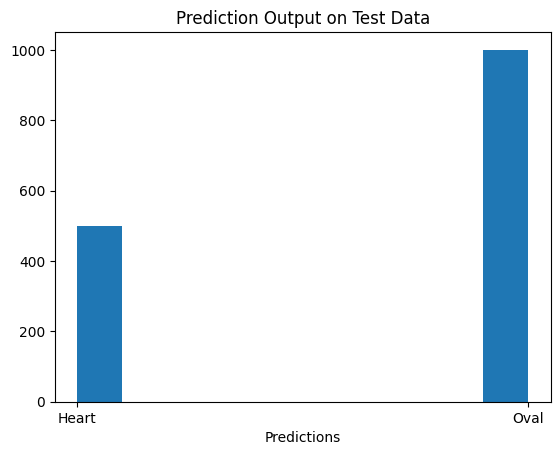

In [ ]:
print(f"ACCURACY SCORE : {test_output_df[test_output_df['correct_prediction'] == True].shape[0] / test_output_df.shape[0]}")
plt.hist(test_output_df['prediction'].apply(lambda row : os.listdir(test_dir_scaled_cropped)[row] ))
#plt.xticks(np.arange(0,5))
plt.xlabel('Predictions')
plt.title('Prediction Output on Test Data')
plt.show()

In [ ]:
test_output_df[test_output_df['correct_prediction'] == True].shape[0] / test_output_df.shape[0]

0.21733333333333332

## Model From Scratch (CNN)
Condition 3 :
1. Train Data is Pre-Processed
2. Test Data is Pre-Processed
3. Image Augmentation (horizontal flip) to Train Data
4. Grayscaled Image to Train Data
5. Grayscaled Image to Test Data

### Model 1

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
del train_datagen
del train_generator
del test_datagen
del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
# GRADED FUNCTION: create_model
def create_model3_1():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 400, 1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout( 0.2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout( 0.2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(64, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.2),
            # 128 neuron hidden layer
            tf.keras.layers.Dense(32, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.1),
            # Only 1 output neuron. It will contain a value from 0-4
            tf.keras.layers.Dense(5, activation='softmax'),
          ])
  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model #return model

In [ ]:
#21.34

model3_1 = create_model3_1()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = model3_1.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/10
63/63 [==============================] - 2103s 33s/step - loss: 43.9889 - accuracy: 0.2103 - val_loss: 14.3394 - val_accuracy: 0.2133
Epoch 2/10
63/63 [==============================] - 475s 8s/step - loss: 11.8449 - accuracy: 0.2081 - val_loss: 7.2112 - val_accuracy: 0.2053
Epoch 3/10
63/63 [==============================] - 468s 7s/step - loss: 5.2628 - accuracy: 0.1995 - val_loss: 3.5456 - val_accuracy: 0.2000
Epoch 4/10
63/63 [==============================] - 430s 7s/step - loss: 2.7302 - accuracy: 0.1975 - val_loss: 2.1844 - val_accuracy: 0.2000
Epoch 5/10
63/63 [==============================] - 469s 7s/step - loss: 2.0730 - accuracy: 0.2001 - val_loss: 2.0261 - val_accuracy: 0.2000
Epoch 6/10
63/63 [==============================] - 467s 7s/step - loss: 2.0230 - accuracy: 0.2001 - val_loss: 2.0218 - val_accuracy: 0.2000
Epoch 7/10
63/63 [==============================] - 466s 7s/step - loss: 2.0224 - accuracy: 0.2001 - val_loss: 2.0230 - val_accuracy: 0.2000
Epoch 8/

In [ ]:
#Predicting Model
temp_model = model3_1 #change input

#from cropped training sample
train_sample1 = sample_image_prep_grayscale(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep_grayscale(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep_grayscale(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep_grayscale(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep_grayscale(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep_grayscale(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep_grayscale(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep_grayscale(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep_grayscale(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep_grayscale(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 136ms/step
[[0.19955914 0.19862062 0.19941291 0.20062219 0.20178509]]
1/1 [==============================] - 0s 42ms/step
[[0.19955914 0.19862062 0.19941291 0.20062219 0.20178509]]
1/1 [==============================] - 0s 50ms/step
[[0.19955914 0.19862062 0.19941291 0.20062219 0.20178509]]
1/1 [==============================] - 0s 49ms/step
[[0.19955914 0.19862062 0.19941291 0.20062219 0.20178509]]
1/1 [==============================] - 0s 48ms/step
[[0.19955914 0.19862062 0.19941291 0.20062219 0.20178509]]

Testing Sample Predictions:
1/1 [==============================] - 0s 44ms/step
[[0.19955914 0.19862062 0.19941291 0.20062219 0.20178509]]
1/1 [==============================] - 0s 44ms/step
[[0.19955914 0.19862062 0.19941291 0.20062219 0.20178509]]
1/1 [==============================] - 0s 51ms/step
[[0.19955914 0.19862062 0.19941291 0.20062219 0.2

In [ ]:
#Saving Model
model_filename = 'model_cond3_type1.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model3_1.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting from Loaded Model
#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 456ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 71ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 74ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 72ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 75ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]

Testing Sample Predictions:
1/1 [==============================] - 0s 48ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 45ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.20062399]]
1/1 [==============================] - 0s 45ms/step
[[0.19954899 0.1990554  0.20127864 0.19949298 0.2

### Model 2

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
del train_datagen
del train_generator
del test_datagen
del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
# GRADED FUNCTION: create_model
def create_model3_2():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 400, 1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout( 0.2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            # 64 neuron hidden layer
            tf.keras.layers.Dense(64, activation='relu'),
            # 128 neuron hidden layer
            tf.keras.layers.Dense(32, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.2),
            # Only 1 output neuron. It will contain a value from 0-4
            tf.keras.layers.Dense(5, activation='softmax'),
          ])
  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model #return model

In [ ]:
#21.34

model3_2 = create_model3_2()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = model3_2.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/10
63/63 [==============================] - 979s 16s/step - loss: 22.6344 - accuracy: 0.2161 - val_loss: 10.8941 - val_accuracy: 0.2433
Epoch 2/10
63/63 [==============================] - 270s 4s/step - loss: 6.0946 - accuracy: 0.2391 - val_loss: 2.8312 - val_accuracy: 0.2367
Epoch 3/10
63/63 [==============================] - 275s 4s/step - loss: 2.2513 - accuracy: 0.2571 - val_loss: 2.0369 - val_accuracy: 0.2347
Epoch 4/10
63/63 [==============================] - 278s 4s/step - loss: 2.0157 - accuracy: 0.2783 - val_loss: 2.0150 - val_accuracy: 0.2460
Epoch 5/10
63/63 [==============================] - 271s 4s/step - loss: 1.9836 - accuracy: 0.2971 - val_loss: 2.0193 - val_accuracy: 0.2533
Epoch 6/10
63/63 [==============================] - 275s 4s/step - loss: 1.9670 - accuracy: 0.2926 - val_loss: 2.0400 - val_accuracy: 0.2173
Epoch 7/10
63/63 [==============================] - 283s 5s/step - loss: 1.9556 - accuracy: 0.3043 - val_loss: 1.9997 - val_accuracy: 0.2620
Epoch 8/10

In [ ]:
#Predicting Model
temp_model = model3_2 #change input

#from cropped training sample
train_sample1 = sample_image_prep_grayscale(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep_grayscale(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep_grayscale(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep_grayscale(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep_grayscale(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep_grayscale(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep_grayscale(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep_grayscale(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep_grayscale(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep_grayscale(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 206ms/step
[[0.15425542 0.0992581  0.20267422 0.264732   0.2790803 ]]
1/1 [==============================] - 0s 44ms/step
[[0.15397578 0.09885152 0.20280859 0.26491717 0.27944693]]
1/1 [==============================] - 0s 43ms/step
[[0.15424985 0.09933238 0.20271663 0.26485115 0.27884996]]
1/1 [==============================] - 0s 47ms/step
[[0.1547777  0.10062938 0.20216411 0.26411882 0.27831   ]]
1/1 [==============================] - 0s 43ms/step
[[0.15399557 0.09901778 0.2028176  0.26472354 0.27944547]]

Testing Sample Predictions:
1/1 [==============================] - 0s 44ms/step
[[0.15445244 0.09956928 0.20260087 0.26470348 0.27867392]]
1/1 [==============================] - 0s 42ms/step
[[0.15447994 0.10009041 0.20265126 0.26430297 0.27847546]]
1/1 [==============================] - 0s 42ms/step
[[0.15433395 0.09909575 0.20271428 0.2648929  0.2

In [ ]:
#Saving Model
model_filename = 'model_cond3_type2.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model3_2.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep_grayscale(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep_grayscale(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep_grayscale(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep_grayscale(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep_grayscale(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep_grayscale(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep_grayscale(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep_grayscale(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep_grayscale(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep_grayscale(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))

Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 140ms/step
[[0.15425542 0.0992581  0.20267422 0.264732   0.2790803 ]]
1/1 [==============================] - 0s 52ms/step
[[0.15397578 0.09885152 0.20280859 0.26491717 0.27944693]]
1/1 [==============================] - 0s 48ms/step
[[0.15424985 0.09933238 0.20271663 0.26485115 0.27884996]]
1/1 [==============================] - 0s 44ms/step
[[0.1547777  0.10062938 0.20216411 0.26411882 0.27831   ]]
1/1 [==============================] - 0s 47ms/step
[[0.15399557 0.09901778 0.2028176  0.26472354 0.27944547]]

Testing Sample Predictions:
1/1 [==============================] - 0s 55ms/step
[[0.15445244 0.09956928 0.20260087 0.26470348 0.27867392]]
1/1 [==============================] - 0s 36ms/step
[[0.15447994 0.10009041 0.20265126 0.26430297 0.27847546]]
1/1 [==============================] - 0s 35ms/step
[[0.15433395 0.09909575 0.20271428 0.2648929  0.2

## Transfer Learning

### MobilenetV2 (different input shape problem!)

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
# GRADED FUNCTION: create_model
def create_model2():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 400, 1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(64, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.2),
            # 128 neuron hidden layer
            tf.keras.layers.Dense(32, activation='relu'),
            #Dropout Layer
            tf.keras.layers.Dropout( 0.2),
            # Only 1 output neuron. It will contain a value from 0-4
            tf.keras.layers.Dense(5, activation='softmax'),
          ])
  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model #return model

In [ ]:
#21.34

model2_2 = create_model2()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = model2_2.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/10
63/63 [==============================] - 1399s 22s/step - loss: 51.7806 - accuracy: 0.2276 - val_loss: 4.1102 - val_accuracy: 0.2667
Epoch 2/10
63/63 [==============================] - 422s 7s/step - loss: 3.8114 - accuracy: 0.3006 - val_loss: 3.1913 - val_accuracy: 0.2727
Epoch 3/10
63/63 [==============================] - 420s 7s/step - loss: 4.2084 - accuracy: 0.3398 - val_loss: 13.2305 - val_accuracy: 0.1967
Epoch 4/10
63/63 [==============================] - 422s 7s/step - loss: 4.3008 - accuracy: 0.3631 - val_loss: 2.3386 - val_accuracy: 0.3280
Epoch 5/10
63/63 [==============================] - 449s 7s/step - loss: 3.4135 - accuracy: 0.3871 - val_loss: 2.1494 - val_accuracy: 0.3333
Epoch 6/10
63/63 [==============================] - 416s 7s/step - loss: 2.5603 - accuracy: 0.4619 - val_loss: 4.9124 - val_accuracy: 0.2080
Epoch 7/10
63/63 [==============================] - 443s 7s/step - loss: 2.8562 - accuracy: 0.4734 - val_loss: 1.9995 - val_accuracy: 0.3860
Epoch 8/1

In [ ]:
#Saving Model
model_filename = 'model_cond3_type1.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model2_2.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
train_generator.sample_weight

In [ ]:
# CHECK TRAINING PERFORMANCES
proba_values_train, true_class_output_train, pred_class_output_train, img_output_train  = get_manual_checked_results(train_dir_scaled_cropped, model2_2)
loaded_proba_values_train, loaded_true_class_output_train, loaded_pred_class_output_train, loaded_img_output_train  = get_manual_checked_results(train_dir_scaled_cropped, loaded_model)

Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']


ValueError: ignored

In [ ]:
# TRAIN DATA PREDICTION RESULTS
train_pred_output_df = get_prediction_output_df(proba_values_train, true_class_output_train, pred_class_output_train, img_output_train)
loaded_train_pred_output_df = get_prediction_output_df(loaded_proba_values_train, loaded_true_class_output_train, loaded_pred_class_output_train, loaded_img_output_train )

In [ ]:
train_pred_output_df.describe()

In [ ]:
loaded_train_pred_output_df.describe()

ACCURACY SCORE : 0.22280570142535633


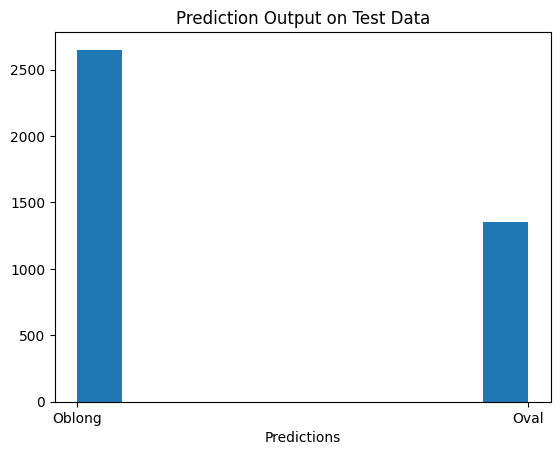

In [ ]:
print(f"ACCURACY SCORE : {train_output_df[train_output_df['correct_prediction'] == True].shape[0] / train_output_df.shape[0]}")
plt.hist(train_output_df['prediction'].apply(lambda row : os.listdir(train_dir_scaled_cropped)[row] ))
#plt.xticks(np.arange(0,5))
plt.xlabel('Predictions')
plt.title('Prediction Output on Test Data')
plt.show()

In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(128,128,3))

mobile_net_layers.trainable = False


mobile_net = tf.keras.Sequential([
  mobile_net_layers,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(5,activation='softmax')
])

mobile_net.summary()

## Inception
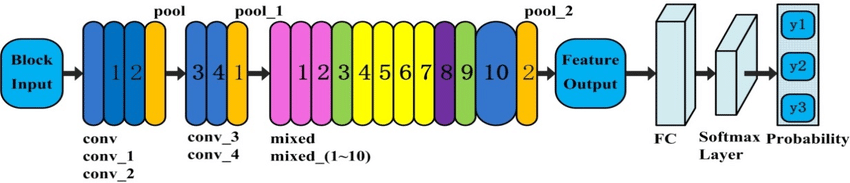

### Condition 1:
1. Train Data is Pre-Processed
2. Test Data is Not Pre-Processed
3. Mixed 7 Layer

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-27 03:35:47--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  70.4MB/s    in 1.2s    

2023-05-27 03:35:49 (70.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 199, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 199, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.999):
#       print("\nReached 99.9% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 126,549,925 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 10,
                    verbose = 1
                    # callbacks=callbacks
                    )

Epoch 1/10
200/200 [==============================] - 1805s 9s/step - loss: 603.4264 - accuracy: 0.2648 - val_loss: 676.6634 - val_accuracy: 0.2180
Epoch 2/10
200/200 [==============================] - 1731s 9s/step - loss: 498.3042 - accuracy: 0.2996 - val_loss: 589.1017 - val_accuracy: 0.2773
Epoch 3/10
200/200 [==============================] - 1702s 9s/step - loss: 450.4677 - accuracy: 0.3276 - val_loss: 506.3408 - val_accuracy: 0.2607
Epoch 4/10
200/200 [==============================] - 1689s 8s/step - loss: 425.3258 - accuracy: 0.3501 - val_loss: 331.2139 - val_accuracy: 0.2647
Epoch 5/10
200/200 [==============================] - 1757s 9s/step - loss: 396.9850 - accuracy: 0.3828 - val_loss: 480.9918 - val_accuracy: 0.2487
Epoch 6/10
200/200 [==============================] - 1674s 8s/step - loss: 362.9954 - accuracy: 0.4041 - val_loss: 473.3651 - val_accuracy: 0.2407
Epoch 7/10
200/200 [==============================] - 1671s 8s/step - loss: 334.3983 - accuracy: 0.4364 - val_lo

### Condition 2:
1. Train Data is Processed
2. Test Data is Not Processed
3. Mixed7 Layer

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
del train_datagen
del train_generator
del test_datagen
del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size = 12,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-07 01:57:20--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   178MB/s    in 0.5s    

2023-06-07 01:57:20 (178 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.999):
#       print("\nReached 99.9% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 126,549,925 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 10,
                    verbose = 1
                    # callbacks=callbacks
                    )

Epoch 1/10
63/63 [==============================] - 912s 14s/step - loss: 1058.2384 - accuracy: 0.2401 - val_loss: 454.9825 - val_accuracy: 0.2433
Epoch 2/10
63/63 [==============================] - 904s 14s/step - loss: 569.5098 - accuracy: 0.2666 - val_loss: 397.9237 - val_accuracy: 0.2913
Epoch 3/10
63/63 [==============================] - 899s 14s/step - loss: 526.6150 - accuracy: 0.2913 - val_loss: 372.4451 - val_accuracy: 0.2833
Epoch 4/10
63/63 [==============================] - 899s 14s/step - loss: 471.1421 - accuracy: 0.3186 - val_loss: 440.9259 - val_accuracy: 0.2560
Epoch 5/10
63/63 [==============================] - 898s 14s/step - loss: 467.4470 - accuracy: 0.3296 - val_loss: 372.7830 - val_accuracy: 0.2960
Epoch 6/10
63/63 [==============================] - 898s 14s/step - loss: 415.3755 - accuracy: 0.3376 - val_loss: 261.5308 - val_accuracy: 0.3320
Epoch 7/10
63/63 [==============================] - 896s 14s/step - loss: 387.4629 - accuracy: 0.3558 - val_loss: 528.0292 

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.2933438  0.21436273 0.31806144 0.05486743 0.11936456]]
1/1 [==============================] - 0s 250ms/step
[[0.33572996 0.26377136 0.22268873 0.04894807 0.1288618 ]]
1/1 [==============================] - 0s 253ms/step
[[0.4498208  0.10277158 0.18946975 0.18252234 0.07541552]]
1/1 [==============================] - 0s 249ms/step
[[0.49490955 0.18266541 0.18633294 0.04095286 0.09513935]]
1/1 [==============================] - 0s 195ms/step
[[0.33438185 0.19334462 0.30837515 0.05847237 0.10542601]]

Testing Sample Predictions:
1/1 [==============================] - 0s 182ms/step
[[0.11370731 0.46862134 0.15810925 0.10385042 0.15571168]]
1/1 [==============================] - 0s 187ms/step
[[0.1269774  0.43561137 0.21248128 0.07017414 0.15475588]]
1/1 [==============================] - 0s 179ms/step
[[0.21401334 0.34755382 0.2971577  0.04659016

In [ ]:
#Saving Model
model_filename = 'model_tl_inception_type2.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Load Model
model_filename = 'model_tl_inception_type2.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.2933438  0.21436273 0.31806144 0.05486743 0.11936456]]
1/1 [==============================] - 0s 253ms/step
[[0.33572996 0.26377136 0.22268873 0.04894807 0.1288618 ]]
1/1 [==============================] - 0s 253ms/step
[[0.4498208  0.10277158 0.18946975 0.18252234 0.07541552]]
1/1 [==============================] - 0s 254ms/step
[[0.49490955 0.18266541 0.18633294 0.04095286 0.09513935]]
1/1 [==============================] - 0s 255ms/step
[[0.33438185 0.19334462 0.30837515 0.05847237 0.10542601]]

Testing Sample Predictions:
1/1 [==============================] - 0s 255ms/step
[[0.11370731 0.46862134 0.15810925 0.10385042 0.15571168]]
1/1 [==============================] - 0s 255ms/step
[[0.1269774  0.43561137 0.21248128 0.07017414 0.15475588]]
1/1 [==============================] - 0s 261ms/step
[[0.21401334 0.34755382 0.2971577  0.04659016

### Condition 3:
1. Train Data is Processed
2. Test Data is Processed
3. Mixed7 Layer
4. batch_size = 16

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-07 13:28:11--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  20.8MB/s    in 4.9s    

2023-06-07 13:28:16 (17.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 199, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 199, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.999):
#       print("\nReached 99.9% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 126,549,925 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 10,
                    verbose = 1
                    # callbacks=callbacks
                    )

Epoch 1/10
250/250 [==============================] - 3107s 12s/step - loss: 479.1068 - accuracy: 0.2441 - val_loss: 225.7625 - val_accuracy: 0.2767
Epoch 2/10
250/250 [==============================] - 1663s 7s/step - loss: 280.9772 - accuracy: 0.2996 - val_loss: 464.2552 - val_accuracy: 0.2880
Epoch 3/10
250/250 [==============================] - 1651s 7s/step - loss: 265.4908 - accuracy: 0.3258 - val_loss: 206.6620 - val_accuracy: 0.2960
Epoch 4/10
250/250 [==============================] - 1665s 7s/step - loss: 250.7201 - accuracy: 0.3546 - val_loss: 303.0817 - val_accuracy: 0.2593
Epoch 5/10
250/250 [==============================] - 1680s 7s/step - loss: 222.3947 - accuracy: 0.3858 - val_loss: 306.7876 - val_accuracy: 0.2900
Epoch 6/10
250/250 [==============================] - 1660s 7s/step - loss: 212.5111 - accuracy: 0.3996 - val_loss: 485.8851 - val_accuracy: 0.2787
Epoch 7/10
250/250 [==============================] - 1687s 7s/step - loss: 207.9873 - accuracy: 0.4164 - val_l

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.04798494 0.32583323 0.20854731 0.14861517 0.26901928]]
1/1 [==============================] - 0s 281ms/step
[[0.07392634 0.4046961  0.11761997 0.09578436 0.30797324]]
1/1 [==============================] - 0s 294ms/step
[[0.07973538 0.31332704 0.19922014 0.2601938  0.14752372]]
1/1 [==============================] - 0s 288ms/step
[[0.08738165 0.39297923 0.1361934  0.11749028 0.2659554 ]]
1/1 [==============================] - 0s 286ms/step
[[0.04318194 0.33874747 0.19703642 0.10643928 0.31459495]]

Testing Sample Predictions:
1/1 [==============================] - 0s 288ms/step
[[0.01870104 0.38705927 0.18440667 0.16380613 0.24602689]]
1/1 [==============================] - 0s 289ms/step
[[0.03519795 0.44559792 0.15854561 0.1598735  0.20078503]]
1/1 [==============================] - 0s 299ms/step
[[0.0454456  0.40030158 0.17761937 0.14989264

In [ ]:
#Saving Model
model_filename = 'model_tl_inception_type2.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Load Model
model_filename = 'model_tl_inception_type2.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 3s 3s/step
[[0.04798494 0.32583323 0.20854731 0.14861517 0.26901928]]
1/1 [==============================] - 0s 280ms/step
[[0.07392634 0.4046961  0.11761997 0.09578436 0.30797324]]
1/1 [==============================] - 0s 287ms/step
[[0.07973538 0.31332704 0.19922014 0.2601938  0.14752372]]
1/1 [==============================] - 0s 291ms/step
[[0.08738165 0.39297923 0.1361934  0.11749028 0.2659554 ]]
1/1 [==============================] - 0s 277ms/step
[[0.04318194 0.33874747 0.19703642 0.10643928 0.31459495]]

Testing Sample Predictions:
1/1 [==============================] - 0s 287ms/step
[[0.01870104 0.38705927 0.18440667 0.16380613 0.24602689]]
1/1 [==============================] - 0s 286ms/step
[[0.03519795 0.44559792 0.15854561 0.1598735  0.20078503]]
1/1 [==============================] - 0s 281ms/step
[[0.0454456  0.40030158 0.17761937 0.14989264

### Condition 4:
1. Train Data is Processed
2. Test Data is Not Processed
3. Mixed5 Layer (larger parameters)
4. batch_size = 16
5. Grayscaled

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped2,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped2,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 4400 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-08 00:59:06--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 209.85.234.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   279MB/s    in 0.3s    

2023-06-08 00:59:06 (279 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_658 (Conv2D)            (None, 124, 199, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_658 (Batch  (None, 124, 199, 32  96         ['conv2d_658[0][0]']             
 Normalization)                 )                                                      

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed5')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed5/concat:0', description="created by layer 'mixed5'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 122,713,317 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 10,
                    verbose = 1
                    # callbacks=callbacks
                    )

Epoch 1/10
275/275 [==============================] - 1383s 5s/step - loss: 3707.0859 - accuracy: 0.2068 - val_loss: 3178.2051 - val_accuracy: 0.1991
Epoch 2/10
275/275 [==============================] - 1342s 5s/step - loss: 3299.6143 - accuracy: 0.1918 - val_loss: 2695.7820 - val_accuracy: 0.2091
Epoch 3/10
275/275 [==============================] - 1322s 5s/step - loss: 3105.2219 - accuracy: 0.1852 - val_loss: 1542.9728 - val_accuracy: 0.2036
Epoch 4/10
202/275 [=====================>........] - ETA: 4:58 - loss: 2853.2429 - accuracy: 0.2085

KeyboardInterrupt: ignored

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


In [ ]:
#Saving Model
model_filename = 'model_tl_inception_type4.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Load Model
model_filename = 'model_tl_inception_type2.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


### Condition 5 :
1. Train Data is Processed
2. Test Data is Not Processed
3. Mixed9 Layer (smaller parameters)
4. batch_size = 16
5. Grayscaled

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped2,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped2,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 4400 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-08 02:24:49--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.253.114.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  88.8MB/s    in 0.9s    

2023-06-08 02:24:50 (88.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_752 (Conv2D)            (None, 124, 199, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_752 (Batch  (None, 124, 199, 32  96         ['conv2d_752[0][0]']             
 Normalization)                 )                                                      

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed9')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 6, 11, 2048)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 6, 11, 2048), dtype=tf.float32, name=None), name='mixed9/concat:0', description="created by layer 'mixed9'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = tf.keras.layers.Dropout(0.1)(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = tf.keras.layers.Dropout(0.1)(x)

  x = tf.keras.layers.Dense(64, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = tf.keras.layers.Dropout(0.1)(x)

  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 85,003,493 total parameters in this model.
There are 69,280,773 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 10,
                    verbose = 1
                    # callbacks=callbacks
                    )

Epoch 1/10
275/275 [==============================] - 1486s 5s/step - loss: 54.4243 - accuracy: 0.1848 - val_loss: 1.6570 - val_accuracy: 0.1900
Epoch 2/10
275/275 [==============================] - 1471s 5s/step - loss: 1.8832 - accuracy: 0.1957 - val_loss: 1.6069 - val_accuracy: 0.2055
Epoch 3/10
275/275 [==============================] - 1465s 5s/step - loss: 1.6241 - accuracy: 0.1995 - val_loss: 1.6065 - val_accuracy: 0.2064
Epoch 4/10
275/275 [==============================] - 1438s 5s/step - loss: 1.6093 - accuracy: 0.2000 - val_loss: 1.6076 - val_accuracy: 0.2055
Epoch 5/10
275/275 [==============================] - 1470s 5s/step - loss: 1.6095 - accuracy: 0.1998 - val_loss: 1.6076 - val_accuracy: 0.2055
Epoch 6/10
 72/275 [======>.......................] - ETA: 14:47 - loss: 1.6095 - accuracy: 0.1988

KeyboardInterrupt: ignored

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


In [ ]:
#Saving Model
model_filename = 'model_tl_inception_type4.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Load Model
model_filename = 'model_tl_inception_type2.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


### Condition 6:
1. Train Data is Processed
2. Test Data is Processed
3. Mixed7 Layer
4. batch_size = 16

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-13 09:23:34--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   147MB/s    in 0.6s    

2023-06-13 09:23:35 (147 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 199, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 199, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.999):
#       print("\nReached 99.9% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 126,549,925 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 15,
                    verbose = 1
                    # callbacks=callbacks







                    )

Epoch 1/15
250/250 [==============================] - 1307s 5s/step - loss: 730.6969 - accuracy: 0.2486 - val_loss: 692.1533 - val_accuracy: 0.2573
Epoch 2/15
250/250 [==============================] - 1067s 4s/step - loss: 466.8330 - accuracy: 0.3016 - val_loss: 300.1748 - val_accuracy: 0.3107
Epoch 3/15
250/250 [==============================] - 1000s 4s/step - loss: 408.3281 - accuracy: 0.3456 - val_loss: 393.7631 - val_accuracy: 0.3147
Epoch 4/15
250/250 [==============================] - 1043s 4s/step - loss: 386.3824 - accuracy: 0.3676 - val_loss: 427.1605 - val_accuracy: 0.3413
Epoch 5/15
250/250 [==============================] - 1056s 4s/step - loss: 327.8882 - accuracy: 0.3938 - val_loss: 1031.1417 - val_accuracy: 0.2000
Epoch 6/15
250/250 [==============================] - 1048s 4s/step - loss: 311.4746 - accuracy: 0.4171 - val_loss: 486.6192 - val_accuracy: 0.3113
Epoch 7/15
250/250 [==============================] - 1047s 4s/step - loss: 286.8048 - accuracy: 0.4424 - val_l

In [ ]:
#Saving Model
model_filename = 'model_tl_inception_type6.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.04798494 0.32583323 0.20854731 0.14861517 0.26901928]]
1/1 [==============================] - 0s 281ms/step
[[0.07392634 0.4046961  0.11761997 0.09578436 0.30797324]]
1/1 [==============================] - 0s 294ms/step
[[0.07973538 0.31332704 0.19922014 0.2601938  0.14752372]]
1/1 [==============================] - 0s 288ms/step
[[0.08738165 0.39297923 0.1361934  0.11749028 0.2659554 ]]
1/1 [==============================] - 0s 286ms/step
[[0.04318194 0.33874747 0.19703642 0.10643928 0.31459495]]

Testing Sample Predictions:
1/1 [==============================] - 0s 288ms/step
[[0.01870104 0.38705927 0.18440667 0.16380613 0.24602689]]
1/1 [==============================] - 0s 289ms/step
[[0.03519795 0.44559792 0.15854561 0.1598735  0.20078503]]
1/1 [==============================] - 0s 299ms/step
[[0.0454456  0.40030158 0.17761937 0.14989264

In [ ]:
#Load Model
model_filename = 'model_tl_inception_type6.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample1))
print(temp_model.predict(train_sample2))
print(temp_model.predict(train_sample3))
print(temp_model.predict(train_sample4))
print(temp_model.predict(train_sample5))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample1))
print(temp_model.predict(test_sample2))
print(temp_model.predict(test_sample3))
print(temp_model.predict(test_sample4))
print(temp_model.predict(test_sample5))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 3s 3s/step
[[0.13019197 0.5353609  0.10415777 0.07432846 0.15596102]]
1/1 [==============================] - 0s 434ms/step
[[0.21339071 0.49949285 0.05617039 0.04971798 0.18122807]]
1/1 [==============================] - 0s 493ms/step
[[0.19273315 0.3423709  0.08282789 0.33973432 0.04233376]]
1/1 [==============================] - 0s 334ms/step
[[0.42724493 0.35496378 0.02373325 0.03431062 0.15974742]]
1/1 [==============================] - 0s 483ms/step
[[0.24987529 0.4706771  0.04015845 0.059788   0.17950118]]

Testing Sample Predictions:
1/1 [==============================] - 0s 452ms/step
[[0.03919689 0.7055195  0.01495537 0.09813849 0.14218973]]
1/1 [==============================] - 0s 419ms/step
[[0.07440031 0.72323656 0.02860772 0.09450129 0.07925414]]
1/1 [==============================] - 0s 439ms/step
[[0.1172326  0.73005515 0.04876312 0.03576808

### Condition 7:
1. Train Data is Processed
2. Test Data is Processed
3. Mixed7 Layer
4. batch_size = 16

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-13 17:31:15--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   231MB/s    in 0.4s    

2023-06-13 17:31:16 (231 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 199, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 199, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.999):
#       print("\nReached 99.9% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 126,549,925 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 30,
                    verbose = 1
                    # callbacks=callbacks
                    )

Epoch 1/30
250/250 [==============================] - 1924s 8s/step - loss: 785.2920 - accuracy: 0.2548 - val_loss: 739.8583 - val_accuracy: 0.2653
Epoch 2/30
250/250 [==============================] - 1680s 7s/step - loss: 580.2443 - accuracy: 0.2956 - val_loss: 729.6356 - val_accuracy: 0.3053
Epoch 3/30
250/250 [==============================] - 1727s 7s/step - loss: 557.1041 - accuracy: 0.3401 - val_loss: 737.8527 - val_accuracy: 0.2527
Epoch 4/30
250/250 [==============================] - 1706s 7s/step - loss: 529.8627 - accuracy: 0.3476 - val_loss: 530.7810 - val_accuracy: 0.2913
Epoch 5/30
250/250 [==============================] - 1690s 7s/step - loss: 457.2928 - accuracy: 0.3796 - val_loss: 358.6916 - val_accuracy: 0.3593
Epoch 6/30
250/250 [==============================] - 1590s 6s/step - loss: 392.4335 - accuracy: 0.4324 - val_loss: 853.5742 - val_accuracy: 0.2840
Epoch 7/30
250/250 [==============================] - 1659s 7s/step - loss: 353.8477 - accuracy: 0.4476 - val_lo

UnknownError: ignored

In [ ]:
#Saving Model
model_filename = 'model_tl_inception_type7.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample4).round(2))
print(temp_model.predict(train_sample1).round(2))
print(temp_model.predict(train_sample2).round(2))
print(temp_model.predict(train_sample5).round(2))
print(temp_model.predict(train_sample3).round(2))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample4).round(2))
print(temp_model.predict(test_sample1).round(2))
print(temp_model.predict(test_sample2).round(2))
print(temp_model.predict(test_sample5).round(2))
print(temp_model.predict(test_sample3).round(2))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 424ms/step
[[0.43 0.51 0.03 0.   0.03]]
1/1 [==============================] - 0s 442ms/step
[[0.13 0.77 0.07 0.   0.02]]
1/1 [==============================] - 0s 436ms/step
[[0.1  0.81 0.02 0.   0.07]]
1/1 [==============================] - 0s 462ms/step
[[0.16 0.72 0.05 0.   0.07]]
1/1 [==============================] - 0s 477ms/step
[[0.3  0.57 0.04 0.07 0.02]]

Testing Sample Predictions:
1/1 [==============================] - 0s 393ms/step
[[0.53 0.42 0.05 0.   0.  ]]
1/1 [==============================] - 0s 454ms/step
[[0.03 0.74 0.05 0.   0.18]]
1/1 [==============================] - 0s 498ms/step
[[0.06 0.88 0.03 0.   0.02]]
1/1 [==============================] - 0s 420ms/step
[[0.05 0.93 0.02 0.   0.  ]]
1/1 [==============================] - 0s 486ms/step
[[0.05 0.93 0.01 0.   0.01]]


In [ ]:
#Load Model
model_filename = 'model_tl_inception_type7.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample4).round(2))
print(temp_model.predict(train_sample1).round(2))
print(temp_model.predict(train_sample2).round(2))
print(temp_model.predict(train_sample5).round(2))
print(temp_model.predict(train_sample3).round(2))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample4).round(2))
print(temp_model.predict(test_sample1).round(2))
print(temp_model.predict(test_sample2).round(2))
print(temp_model.predict(test_sample5).round(2))
print(temp_model.predict(test_sample3).round(2))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.43 0.51 0.03 0.   0.03]]
1/1 [==============================] - 0s 257ms/step
[[0.13 0.77 0.07 0.   0.02]]
1/1 [==============================] - 0s 299ms/step
[[0.1  0.81 0.02 0.   0.07]]
1/1 [==============================] - 0s 290ms/step
[[0.16 0.72 0.05 0.   0.07]]
1/1 [==============================] - 0s 292ms/step
[[0.3  0.57 0.04 0.07 0.02]]

Testing Sample Predictions:
1/1 [==============================] - 0s 307ms/step
[[0.53 0.42 0.05 0.   0.  ]]
1/1 [==============================] - 0s 270ms/step
[[0.03 0.74 0.05 0.   0.18]]
1/1 [==============================] - 0s 255ms/step
[[0.06 0.88 0.03 0.   0.02]]
1/1 [==============================] - 0s 297ms/step
[[0.05 0.93 0.02 0.   0.  ]]
1/1 [==============================] - 0s 291ms/step
[[0.05 0.93 0.01 0.   0.01]]


### Condition 8 no fitting process:
1. Train Data is Processed
2. Test Data is Processed
3. Mixed7 Layer
4. batch_size = 16

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-14 03:55:53--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  84.1MB/s    in 1.0s    

2023-06-14 03:55:54 (84.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 124, 199, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 124, 199, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.999):
#       print("\nReached 99.9% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 126,549,925 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# # callbacks = myCallback()
# history = model.fit(train_generator,
#                     validation_data = test_generator,
#                     epochs = 30,
#                     verbose = 1
#                     # callbacks=callbacks
#                     )

In [ ]:
# #Saving Model
# model_filename = 'model_tl_inception_type7.h5'

# # Save Model
# model_path = '/content/drive/MyDrive/Models/FaceShape/'
# model.save(model_path + model_filename)

# #Load Model
# model_path = '/content/drive/MyDrive/Models/FaceShape/'
# loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample4).round(2))
print(temp_model.predict(train_sample1).round(2))
print(temp_model.predict(train_sample2).round(2))
print(temp_model.predict(train_sample5).round(2))
print(temp_model.predict(train_sample3).round(2))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample4).round(2))
print(temp_model.predict(test_sample1).round(2))
print(temp_model.predict(test_sample2).round(2))
print(temp_model.predict(test_sample5).round(2))
print(temp_model.predict(test_sample3).round(2))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.18 0.19 0.18 0.16 0.29]]
1/1 [==============================] - 0s 426ms/step
[[0.22 0.14 0.16 0.22 0.26]]
1/1 [==============================] - 0s 467ms/step
[[0.22 0.17 0.18 0.24 0.19]]
1/1 [==============================] - 0s 457ms/step
[[0.16 0.17 0.23 0.26 0.17]]
1/1 [==============================] - 0s 436ms/step
[[0.19 0.2  0.18 0.22 0.22]]

Testing Sample Predictions:
1/1 [==============================] - 0s 446ms/step
[[0.14 0.19 0.17 0.14 0.36]]
1/1 [==============================] - 0s 444ms/step
[[0.14 0.3  0.14 0.13 0.29]]
1/1 [==============================] - 1s 696ms/step
[[0.16 0.18 0.17 0.24 0.25]]
1/1 [==============================] - 1s 794ms/step
[[0.21 0.18 0.15 0.2  0.25]]
1/1 [==============================] - 1s 767ms/step
[[0.21 0.18 0.22 0.13 0.26]]


In [ ]:
#Load Model
model_filename = 'model_tl_inception_type7.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample4).round(2))
print(temp_model.predict(train_sample1).round(2))
print(temp_model.predict(train_sample2).round(2))
print(temp_model.predict(train_sample5).round(2))
print(temp_model.predict(train_sample3).round(2))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample4).round(2))
print(temp_model.predict(test_sample1).round(2))
print(temp_model.predict(test_sample2).round(2))
print(temp_model.predict(test_sample5).round(2))
print(temp_model.predict(test_sample3).round(2))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.43 0.51 0.03 0.   0.03]]
1/1 [==============================] - 0s 257ms/step
[[0.13 0.77 0.07 0.   0.02]]
1/1 [==============================] - 0s 299ms/step
[[0.1  0.81 0.02 0.   0.07]]
1/1 [==============================] - 0s 290ms/step
[[0.16 0.72 0.05 0.   0.07]]
1/1 [==============================] - 0s 292ms/step
[[0.3  0.57 0.04 0.07 0.02]]

Testing Sample Predictions:
1/1 [==============================] - 0s 307ms/step
[[0.53 0.42 0.05 0.   0.  ]]
1/1 [==============================] - 0s 270ms/step
[[0.03 0.74 0.05 0.   0.18]]
1/1 [==============================] - 0s 255ms/step
[[0.06 0.88 0.03 0.   0.02]]
1/1 [==============================] - 0s 297ms/step
[[0.05 0.93 0.02 0.   0.  ]]
1/1 [==============================] - 0s 291ms/step
[[0.05 0.93 0.01 0.   0.01]]


### Condition 8:
1. Train Data is Processed
2. Test Data is Processed
3. Mixed7 Layer
4. batch_size = 16

In [ ]:
#Changing Image Data Generator

#Delete Previous Variable
# del train_datagen
# del train_generator
# del test_datagen
# del test_generator

#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)#, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir_scaled_cropped,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    #color_mode = 'grayscale',
                                                    target_size=(250, 400))

Found 3999 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-14 11:35:32--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.187.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  25.1MB/s    in 4.2s    

2023-06-14 11:35:37 (19.9 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (250, 400, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 199, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 199, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.999):
#       print("\nReached 99.9% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 13, 23, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 13, 23, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  # x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense  (5, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 126,549,925 total parameters in this model.
There are 117,574,661 trainable parameters in this model.


In [ ]:
# callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 20,
                    verbose = 1
                    # callbacks=callbacks
                    )

Epoch 1/20
250/250 [==============================] - 3255s 13s/step - loss: 604.4564 - accuracy: 0.2491 - val_loss: 359.1171 - val_accuracy: 0.2880
Epoch 2/20
250/250 [==============================] - 1724s 7s/step - loss: 390.7471 - accuracy: 0.3066 - val_loss: 290.6519 - val_accuracy: 0.2947
Epoch 3/20
250/250 [==============================] - 1657s 7s/step - loss: 338.4842 - accuracy: 0.3293 - val_loss: 256.7508 - val_accuracy: 0.3173
Epoch 4/20
250/250 [==============================] - 1683s 7s/step - loss: 286.4829 - accuracy: 0.3671 - val_loss: 333.0378 - val_accuracy: 0.3173
Epoch 5/20
250/250 [==============================] - 1685s 7s/step - loss: 290.0585 - accuracy: 0.3731 - val_loss: 309.9409 - val_accuracy: 0.3613
Epoch 6/20
250/250 [==============================] - 1650s 7s/step - loss: 275.3047 - accuracy: 0.4199 - val_loss: 324.8966 - val_accuracy: 0.3640
Epoch 7/20
250/250 [==============================] - 1652s 7s/step - loss: 256.5133 - accuracy: 0.4284 - val_l

In [ ]:
#Saving Model
model_filename = 'model_tl_inception_type8.h5'

# Save Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
model.save(model_path + model_filename)

#Load Model
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

In [ ]:
#Predicting Model
temp_model = model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample4).round(2))
print(temp_model.predict(train_sample1).round(2))
print(temp_model.predict(train_sample2).round(2))
print(temp_model.predict(train_sample5).round(2))
print(temp_model.predict(train_sample3).round(2))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample4).round(2))
print(temp_model.predict(test_sample1).round(2))
print(temp_model.predict(test_sample2).round(2))
print(temp_model.predict(test_sample5).round(2))
print(temp_model.predict(test_sample3).round(2))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 0s 424ms/step
[[0.43 0.51 0.03 0.   0.03]]
1/1 [==============================] - 0s 442ms/step
[[0.13 0.77 0.07 0.   0.02]]
1/1 [==============================] - 0s 436ms/step
[[0.1  0.81 0.02 0.   0.07]]
1/1 [==============================] - 0s 462ms/step
[[0.16 0.72 0.05 0.   0.07]]
1/1 [==============================] - 0s 477ms/step
[[0.3  0.57 0.04 0.07 0.02]]

Testing Sample Predictions:
1/1 [==============================] - 0s 393ms/step
[[0.53 0.42 0.05 0.   0.  ]]
1/1 [==============================] - 0s 454ms/step
[[0.03 0.74 0.05 0.   0.18]]
1/1 [==============================] - 0s 498ms/step
[[0.06 0.88 0.03 0.   0.02]]
1/1 [==============================] - 0s 420ms/step
[[0.05 0.93 0.02 0.   0.  ]]
1/1 [==============================] - 0s 486ms/step
[[0.05 0.93 0.01 0.   0.01]]


In [ ]:
#Load Model
model_filename = 'model_tl_inception_type7.h5'
model_path = '/content/drive/MyDrive/Models/FaceShape/'
loaded_model = load_model(model_path + model_filename)

#Predicting Model
temp_model = loaded_model #change input

#from cropped training sample
train_sample1 = sample_image_prep(train_heart_dir_cropped, 'heart (1).jpg')
train_sample2 = sample_image_prep(train_oblong_dir_cropped, 'oblong (1).jpg')
train_sample3 = sample_image_prep(train_round_dir_cropped, 'round (415).jpg')
train_sample4 = sample_image_prep(train_oval_dir_cropped, 'oval (1).jpg')
train_sample5 = sample_image_prep(train_square_dir_cropped, 'square (88).jpg')

#from cropped testing sample
test_sample1 = sample_image_prep(test_heart_dir_cropped, 'heart (923).jpg')
test_sample2 = sample_image_prep(test_oblong_dir_cropped, 'oblong (802).jpg')
test_sample3 = sample_image_prep(test_round_dir_cropped, 'round (945).jpg')
test_sample4 = sample_image_prep(test_oval_dir_cropped, 'oval (524).jpg')
test_sample5 = sample_image_prep(test_square_dir_cropped, 'square (764).jpg')

print(f'Model Classes: {os.listdir(train_dir_scaled_cropped)}\n')

print('Training Sample Predictions:')
print(temp_model.predict(train_sample4).round(2))
print(temp_model.predict(train_sample1).round(2))
print(temp_model.predict(train_sample2).round(2))
print(temp_model.predict(train_sample5).round(2))
print(temp_model.predict(train_sample3).round(2))

print('\nTesting Sample Predictions:')
print(temp_model.predict(test_sample4).round(2))
print(temp_model.predict(test_sample1).round(2))
print(temp_model.predict(test_sample2).round(2))
print(temp_model.predict(test_sample5).round(2))
print(temp_model.predict(test_sample3).round(2))


Model Classes: ['Oval', 'Heart', 'Oblong', 'Square', 'Round']

Training Sample Predictions:
1/1 [==============================] - 2s 2s/step
[[0.43 0.51 0.03 0.   0.03]]
1/1 [==============================] - 0s 257ms/step
[[0.13 0.77 0.07 0.   0.02]]
1/1 [==============================] - 0s 299ms/step
[[0.1  0.81 0.02 0.   0.07]]
1/1 [==============================] - 0s 290ms/step
[[0.16 0.72 0.05 0.   0.07]]
1/1 [==============================] - 0s 292ms/step
[[0.3  0.57 0.04 0.07 0.02]]

Testing Sample Predictions:
1/1 [==============================] - 0s 307ms/step
[[0.53 0.42 0.05 0.   0.  ]]
1/1 [==============================] - 0s 270ms/step
[[0.03 0.74 0.05 0.   0.18]]
1/1 [==============================] - 0s 255ms/step
[[0.06 0.88 0.03 0.   0.02]]
1/1 [==============================] - 0s 297ms/step
[[0.05 0.93 0.02 0.   0.  ]]
1/1 [==============================] - 0s 291ms/step
[[0.05 0.93 0.01 0.   0.01]]
